# <font color='blue'>**LABORATORIO 2. Clasificación de imágenes usando CNN's**

<font color='red'>Integrantes (Máximo 4 personas):

Nelson Andres Delgado Machado

2236571


Jhon Edinson Caicedo Loaiza

2236467

Miguel Angel Acevedo Delgado

2236570

Jesus Antonio Valencia Escobar

2236558


Estudiar las Redes Neuronales Convolucionales (CNN) es beneficioso por varias razones:

* **Excelente Desempeño en Imágenes**: Las CNN han demostrado un rendimiento excepcional en tareas de visión computacional debido a su capacidad para capturar patrones locales y globales en imágenes.

* **Eficiencia en Términos de Parámetros**: Las CNN están diseñadas para aprovechar la estructura de las imágenes, utilizando capas convolucionales que comparten parámetros. Esto las hace mucho más eficientes en términos de la cantidad de parámetros requeridos en comparación con una red neuronal *FULLY CONNECTED*.

* **Invariancia a Traslaciones**: Las capas convolucionales permiten a las CNN aprender características invariantes a pequeñas traslaciones. Esto significa que la red puede reconocer patrones incluso si están ubicados en diferentes partes de una imagen.

* **Capacidad de Aprendizaje Jerárquico**: Las CNN tienen múltiples capas convolucionales y de agrupación que les permiten aprender características a diferentes niveles de abstracción. Las primeras capas pueden aprender bordes y texturas simples, mientras que las capas más profundas pueden aprender características más complejas y abstractas.

* **Transferencia de Conocimiento**: Las CNN entrenadas en grandes conjuntos de datos, como ImageNet, pueden ser utilizadas como puntos de partida para tareas de clasificación específicas. Esto se conoce como transferencia de conocimiento y puede ahorrar mucho tiempo y recursos en el entrenamiento de modelos.

* **Interpretabilidad Relativa**: Aunque las CNN no son tan interpretables como algunos otros modelos más simples, como árboles de decisión, se han desarrollado técnicas y herramientas para ayudar a comprender qué características están siendo detectadas por diferentes capas de la red.

Siga las instrucciones (<font color='red'>resaltadas en rojo </font>), las cuales además de guiarlo, generarán en suma el puntaje final obtenido para este laboratorio.

In [ ]:
#Para dar un orden al trabajo realizado, coloque aqui todas las librerias que van a ser usadas.
from pandas.io.formats.info import Iterator
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import cv2
import shutil
from keras.models import Sequential
import os
import pathlib
import tensorflow as tf
import tensorflow.keras.layers as LK
import tensorflow.keras.models as MK
from tensorflow import keras
from tensorflow import image
import seaborn as sns; sns.set()
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from  keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping
from keras import callbacks
from keras.preprocessing.image import img_to_array, load_img
from sklearn.model_selection import train_test_split
from keras.regularizers import L2
from keras.regularizers import L1
from keras.regularizers import L1L2
from keras.preprocessing.image import ImageDataGenerator
from pandas.io.formats.info import Iterator
from numpy import expand_dims
import random, os
from keras.models import Model

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
# Vamos a usar el Human Action Recognition (HAR) Dataset de Kaggle

!kaggle datasets download -d meetnagadia/human-action-recognition-har-dataset

 97% 287M/297M [00:01<00:00, 214MB/s]
100% 297M/297M [00:01<00:00, 163MB/s]


In [ ]:
!unzip /content/human-action-recognition-har-dataset.zip

Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: Human Action Recognition/train/Image_5499.jpg  
  inflating: Human Action Recognition/train/Image_55.jpg  
  inflating: Human Action Recognition/train/Image_550.jpg  
  inflating: Human Action Recognition/train/Image_5500.jpg  
  inflating: Human Action Recognition/train/Image_5501.jpg  
  inflating: Human Action Recognition/train/Image_5502.jpg  
  inflating: Human Action Recognition/train/Image_5503.jpg  
  inflating: Human Action Recognition/train/Image_5504.jpg  
  inflating: Human Action Recognition/train/Image_5505.jpg  
  inflating: Human Action Recognition/train/Image_5506.jpg  
  inflating: Human Action Recognition/train/Image_5507.jpg  
  inflating: Human Action Recognition/train/Image_5508.jpg  
  inflating: Human Action Recognition/train/Image_5509.jpg  
  inflating: Human Action Recognition/train/Image_551.jpg  
  inflating: Human Action Recognition/train/Image_5510.jpg  
  inflating: Human Action Re

In [ ]:
train_csv=pd.read_csv("/content/Human Action Recognition/Training_set.csv")
test_csv=pd.read_csv("/content/Human Action Recognition/Testing_set.csv")

In [ ]:
train_csv

filename               label
0          Image_1.jpg             sitting
1          Image_2.jpg        using_laptop
2          Image_3.jpg             hugging
3          Image_4.jpg            sleeping
4          Image_5.jpg        using_laptop
...                ...                 ...
12595  Image_12596.jpg             sitting
12596  Image_12597.jpg            clapping
12597  Image_12598.jpg             sitting
12598  Image_12599.jpg             dancing
12599  Image_12600.jpg  listening_to_music

[12600 rows x 2 columns]

In [ ]:
test_csv

filename
0        Image_1.jpg
1        Image_2.jpg
2        Image_3.jpg
3        Image_4.jpg
4        Image_5.jpg
...              ...
5395  Image_5396.jpg
5396  Image_5397.jpg
5397  Image_5398.jpg
5398  Image_5399.jpg
5399  Image_5400.jpg

[5400 rows x 1 columns]

In [ ]:
train_csv["label"].unique()

array(['sitting', 'using_laptop', 'hugging', 'sleeping', 'drinking',
       'clapping', 'dancing', 'cycling', 'calling', 'laughing', 'eating',
       'fighting', 'listening_to_music', 'running', 'texting'],
      dtype=object)

In [ ]:
len(train_csv["label"].unique())

15

# <font color='red'>Punto 1 (1.0). Preprocesamiento</font>.

El pre-procesamiento de imagenes es una tarea fundamental cuando se desea que la IA trabaje correctamente.

(a) (0.25) Realice un código que le permita mostrar 5 imagenes por cada categoría seleccionadas del dataset.

(b) (0.25) Aunque el dataset ya se encuentra dividido en TRAIN y TEST, a partir del análisis visual realizado en el punto (a), usted deberá tomar la decisión acerca de trabajar el entrenamiento con todo el conjunto de imagenes dadas en TRAIN o con un subconjunto del mismo. Por otro lado usted deberá separar el 10% de las imagenes de TEST y dejarlas como una nueva carpeta de VALIDATION.

(c) (0.5) Realice un código que le permita pre-procesar el dataset. <font color='red'>Si usted decide no hacer ningun tipo de pre-procesamiento, usted deberá explicar claramente el porque usted consideró no necesario realizar este paso.


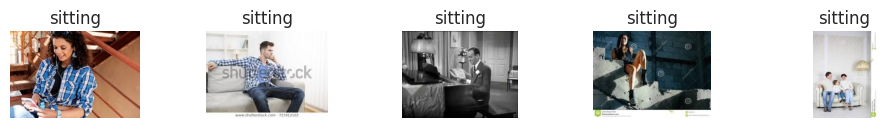

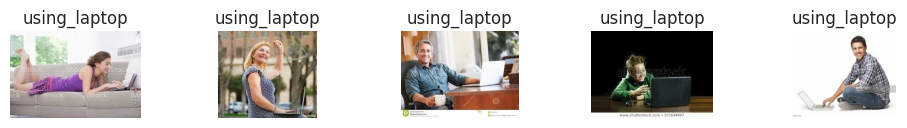

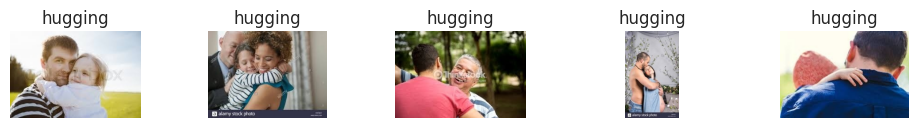

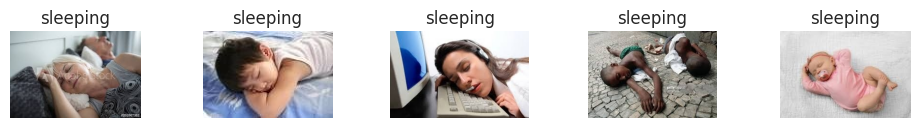

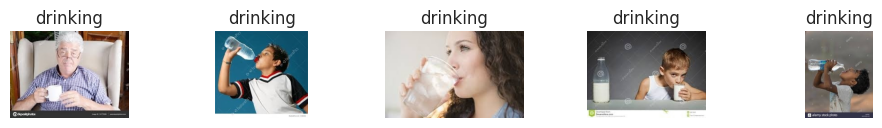

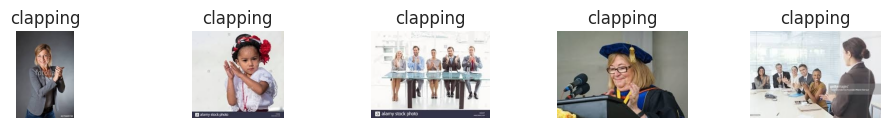

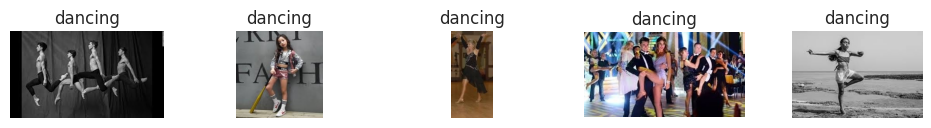

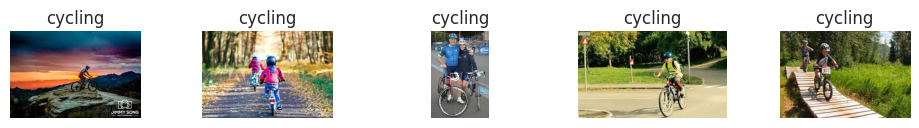

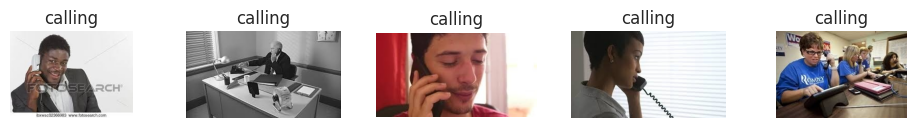

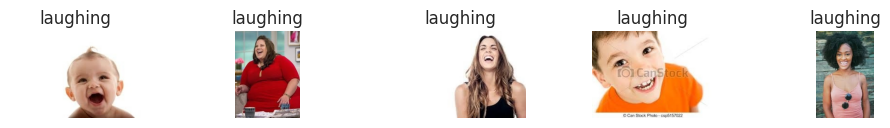

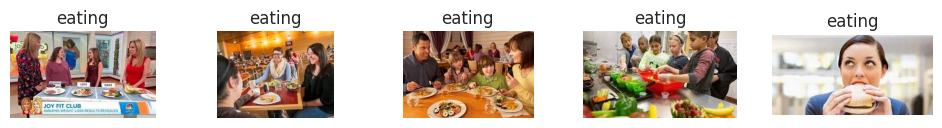

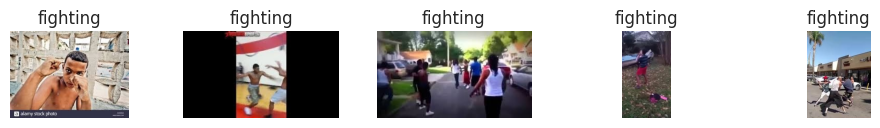

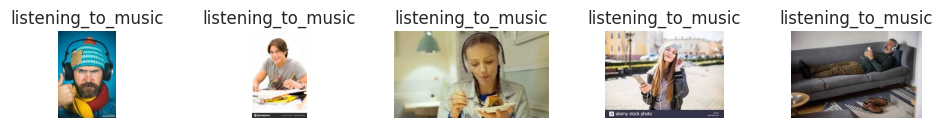

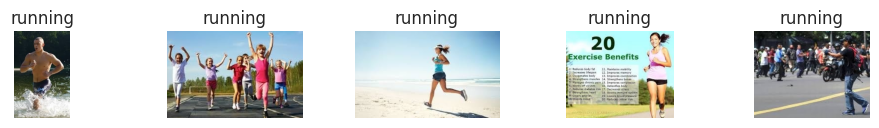

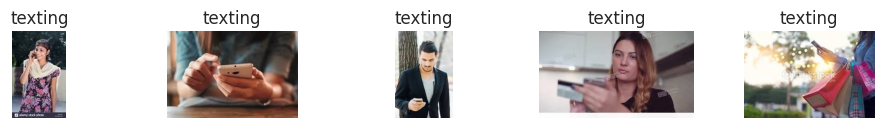

In [ ]:
#Pegue y ejecute  aquí el código para el punto 1a.
for i in train_csv["label"].unique():
  img = train_csv[train_csv.label.isin([i])]
  img = img.head(n=5)
  img_index = img.index
  n = 0
  plt.figure(figsize=(12, 20))
  for j in img_index:

    plt.subplot(15, 5, n+1)
    image = cv2.imread('/content/Human Action Recognition/train/'+img["filename"][j])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.title(i)
    plt.axis('off')
    n+=1
  plt.show()

In [ ]:
filename = train_csv['filename']
labe = train_csv['label']

In [ ]:
train_csv["label"].unique()

array(['sitting', 'using_laptop', 'hugging', 'sleeping', 'drinking',
       'clapping', 'dancing', 'cycling', 'calling', 'laughing', 'eating',
       'fighting', 'listening_to_music', 'running', 'texting'],
      dtype=object)

A continuacion se selecciona un fracmento del dataset original ya que muchas clases son muy parecidas

In [ ]:
train_select_csv = pd.DataFrame()
train_select_csv['filename'] = None
train_select_csv['label'] = None
labels = ['sitting','sleeping','drinking','dancing','cycling','fighting']
for i in labels:
  selectetlabel = train_csv[train_csv.label.isin([i])]
  random_datas = selectetlabel.sample(600)
  train_select_csv = train_select_csv.append(random_datas)
print(train_select_csv)

            filename     label
6170  Image_6171.jpg   sitting
4858  Image_4859.jpg   sitting
4050  Image_4051.jpg   sitting
2271  Image_2272.jpg   sitting
8618  Image_8619.jpg   sitting
...              ...       ...
2361  Image_2362.jpg  fighting
2124  Image_2125.jpg  fighting
8071  Image_8072.jpg  fighting
2241  Image_2242.jpg  fighting
7214  Image_7215.jpg  fighting

[3600 rows x 2 columns]


<ipython-input-15-05bb5da113c5>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_select_csv = train_select_csv.append(random_datas)
<ipython-input-15-05bb5da113c5>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_select_csv = train_select_csv.append(random_datas)
<ipython-input-15-05bb5da113c5>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_select_csv = train_select_csv.append(random_datas)
<ipython-input-15-05bb5da113c5>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_select_csv = train_select_csv.append(random_datas)
<ipython-input-15-05bb5da113c5>:8: FutureWarning: The frame.append method is deprecated and 

In [ ]:
train_select_csv

filename     label
6170  Image_6171.jpg   sitting
4858  Image_4859.jpg   sitting
4050  Image_4051.jpg   sitting
2271  Image_2272.jpg   sitting
8618  Image_8619.jpg   sitting
...              ...       ...
2361  Image_2362.jpg  fighting
2124  Image_2125.jpg  fighting
8071  Image_8072.jpg  fighting
2241  Image_2242.jpg  fighting
7214  Image_7215.jpg  fighting

[3600 rows x 2 columns]

**Para el punto b1**

Se decide tomar el 10% de las imagenes para realizar la validacion, se decide tomar las imagenes del train ya que las imagenes de test no se encuentran etiquetadas y no funcionaria de la manera correcta para validar el modelo.
Adicionalmente se toma un fragmento del dataset ya que al realizar el analisis visual, muchas imagenes se parecen entre ellas.

In [ ]:
train_set, validation_set = train_test_split(train_select_csv, test_size=0.1)

In [ ]:
train_set

filename     label
3871  Image_3872.jpg  sleeping
9450  Image_9451.jpg   dancing
6612  Image_6613.jpg   cycling
3106  Image_3107.jpg  fighting
5440  Image_5441.jpg   dancing
...              ...       ...
4933  Image_4934.jpg   sitting
8438  Image_8439.jpg  drinking
9648  Image_9649.jpg  sleeping
6217  Image_6218.jpg   sitting
7443  Image_7444.jpg   dancing

[3240 rows x 2 columns]

In [ ]:
print("tamaño del set de train : %2d, tamaño del set de validation : %2d" %(len(train_set), len(validation_set)))

tamaño del set de train : 3240, tamaño del set de validation : 360


In [ ]:
!mkdir /content/'Human Action Recognition'/validation

In [ ]:
source_folder = r"/content/Human Action Recognition/train/"
destination_folder = r"/content/Human Action Recognition/validation/"

# iterate files

for file in validation_set['filename']:
  # construct full file path
    source = source_folder + file
    destination = destination_folder + file
    # move file
    shutil.move(source, destination)
    print('Moved:', file)



Moved: Image_1200.jpg
Moved: Image_681.jpg
Moved: Image_3333.jpg
Moved: Image_9183.jpg
Moved: Image_12559.jpg
Moved: Image_2301.jpg
Moved: Image_12331.jpg
Moved: Image_2208.jpg
Moved: Image_11782.jpg
Moved: Image_1317.jpg
Moved: Image_2308.jpg
Moved: Image_10566.jpg
Moved: Image_5929.jpg
Moved: Image_8346.jpg
Moved: Image_6621.jpg
Moved: Image_7745.jpg
Moved: Image_2146.jpg
Moved: Image_5204.jpg
Moved: Image_2527.jpg
Moved: Image_7110.jpg
Moved: Image_12162.jpg
Moved: Image_5352.jpg
Moved: Image_9585.jpg
Moved: Image_10830.jpg
Moved: Image_10748.jpg
Moved: Image_8685.jpg
Moved: Image_8956.jpg
Moved: Image_6993.jpg
Moved: Image_1667.jpg
Moved: Image_1074.jpg
Moved: Image_178.jpg
Moved: Image_8267.jpg
Moved: Image_4955.jpg
Moved: Image_8869.jpg
Moved: Image_2845.jpg
Moved: Image_5043.jpg
Moved: Image_7103.jpg
Moved: Image_1289.jpg
Moved: Image_571.jpg
Moved: Image_3672.jpg
Moved: Image_6062.jpg
Moved: Image_12335.jpg
Moved: Image_9343.jpg
Moved: Image_3802.jpg
Moved: Image_7883.jpg
Moved

In [ ]:
sld_dir = pathlib.Path('/content/Human Action Recognition/validation/')
print("La cantidad de imagenes en la carpeta validation es de: ",len(list(sld_dir.glob('*.jpg'))))


La cantidad de imagenes en la carpeta validation es de:  360


In [ ]:
#Si va a realizar codigo para pre.procesamiento, pegue el codigo aqui.
#De lo contrario haga uso de una pesataña de texto para explicar las razones de no hacerlo.

In [ ]:
def cargadatos(data, tipo):
  width = 100
  height = 100
  dim = (width, height)
  x = []
  y = []
  for i in data["label"].unique():

    imgs = data[data.label.isin([i])]
    imgs_index = imgs.index
    for j in imgs_index:
      image = load_img('/content/Human Action Recognition/'+ tipo +'/'+imgs["filename"][j],target_size=(dim))
      if image is not None:
      #  resize = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
      #  img_to_array(resize)
        image = img_to_array(image)
        x.append(image)
        y.append(i)
  x = np.array(x)
  y = np.array(y)
  return x , y

In [ ]:
x_train, y_train = cargadatos(train_set, 'train')

In [ ]:
x_train.shape

(3240, 100, 100, 3)

In [ ]:
y_train.shape

(3240,)

In [ ]:
x_val, y_val = cargadatos(validation_set, 'validation')

In [ ]:
def normdatos(data):
  x = (data - data.min())/(data.max()-data.min())

  return x

In [ ]:
x_train = normdatos(x_train)
x_val = normdatos(x_val)

In [ ]:
le = LabelEncoder()
le.fit(y_train)
y_train_enco = le.transform(y_train)

In [ ]:
y_train_enco = expand_dims(y_train_enco, 1)

In [ ]:
y_val_enco = le.transform(y_val)

In [ ]:
y_val_enco = expand_dims(y_val_enco, 1)

In [ ]:
y_train_enco.shape

(3240, 1)

Para el punto 4

In [ ]:
def cargartest(data, tipo):
  width = 100
  height = 100
  dim = (width, height)
  x = []

  imgs = data
  imgs_index = imgs.index
  for j in imgs_index:
      image = load_img('/content/Human Action Recognition/'+ tipo +'/'+imgs["filename"][j],target_size=(dim))
      if image is not None:
      #  resize = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
      #  img_to_array(resize)
        image = img_to_array(image)
        x.append(image)

  x = np.array(x)
  return x

In [ ]:
test = cargartest(test_csv, "test")

In [ ]:
test = normdatos(test)

#<font color='red'>Punto 2 (1.0). Cree y entrene un modelo para clasificación usando como base la arquitectura VGG16.

(0.5) Utilice los conocimientos adquiridos para entrenar y validar su modelo. Usted deberá hacer uso de: Gráficas de Accuracy / Loss, MaAtriz de confusión y reporte de clasificación (F1-Score, Recall, Precision)

(0.5) Analice los resultados obtenidos con las diferentes herramientas, dando una explicación que incluya las difernetes métricas y que sean consecuentes con los reultados obtenidos.

In [ ]:
#Pegue y ejecute aquí su código para el punto 2.1
entrada = LK.Input(shape=(100,100,3))
conv1 = LK.Conv2D(64,(3,3), padding='same',activation='relu')(entrada)
conv2 = LK.Conv2D(64,(3,3), padding='same',activation='relu')(conv1)
pool1 = LK.MaxPool2D((2,2),(2,2))(conv2)
conv3 = LK.Conv2D(128,(3,3), padding='same',activation='relu')(pool1)
conv4 = LK.Conv2D(128,(3,3), padding='same',activation='relu')(conv3)
conv5 = LK.Conv2D(128,(3,3), padding='same',activation='relu')(conv4)
pool2 = LK.MaxPool2D((2,2),(2,2))(conv5)
flat = LK.Flatten()(pool2)
fc1 = LK.Dense(120,activation='relu')(flat)
fc2 = LK.Dense(120,activation='relu')(fc1)
salida = LK.Dense(6, activation='softmax')(fc2)

modelo = MK.Model(entrada,salida)
modelo.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 100, 100, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 50, 50, 64)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 50, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 50, 50, 128)       147584    
                                                             

In [ ]:
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
ES = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

In [ ]:
history = modelo.fit(x_train,y_train_enco,epochs=500, batch_size=32, validation_data=(x_val,y_val_enco),callbacks=[ES], verbose=1)
loss, acc = modelo.evaluate(x_val,y_val_enco, verbose=1)
print("Loss:{0} - Accuracy:{1}".format(loss, acc))

Epoch 1/500
102/102 [==============================] - 19s 69ms/step - loss: 1.8064 - accuracy: 0.1664 - val_loss: 1.8030 - val_accuracy: 0.1917
Epoch 2/500
102/102 [==============================] - 6s 58ms/step - loss: 1.6620 - accuracy: 0.2957 - val_loss: 1.8307 - val_accuracy: 0.3250
Epoch 3/500
102/102 [==============================] - 6s 61ms/step - loss: 1.5095 - accuracy: 0.4003 - val_loss: 1.4780 - val_accuracy: 0.4194
Epoch 4/500
102/102 [==============================] - 6s 61ms/step - loss: 1.3049 - accuracy: 0.5003 - val_loss: 1.4851 - val_accuracy: 0.4361
Epoch 5/500
102/102 [==============================] - 6s 61ms/step - loss: 1.1431 - accuracy: 0.5651 - val_loss: 1.4278 - val_accuracy: 0.4250
Epoch 6/500
102/102 [==============================] - 6s 60ms/step - loss: 0.9710 - accuracy: 0.6395 - val_loss: 1.5583 - val_accuracy: 0.4222
Epoch 7/500
102/102 [==============================] - 6s 60ms/step - loss: 0.6752 - accuracy: 0.7543 - val_loss: 2.0763 - val_accuracy

In [ ]:
predicciones = modelo.predict(x_val)

12/12 [==============================] - 0s 17ms/step


In [ ]:
print(predicciones.argmax(1))

[5 5 5 4 4 1 2 4 5 5 2 5 3 4 5 3 3 3 2 4 5 1 5 5 4 4 1 2 5 5 4 3 5 5 5 5 5
 2 4 4 2 5 5 3 5 2 0 5 5 5 3 4 5 2 3 5 5 5 2 2 2 2 2 4 5 1 5 4 5 0 3 0 3 3
 0 0 3 0 0 0 1 0 4 0 0 0 0 1 0 0 0 0 0 4 4 3 5 3 0 3 0 0 0 0 3 1 0 0 4 0 0
 0 1 0 1 0 0 0 0 0 0 4 3 0 5 5 2 1 5 2 1 2 5 4 1 5 4 2 4 1 3 1 5 4 2 3 2 5
 2 3 2 1 4 2 4 4 2 2 3 0 2 2 4 4 2 2 1 5 1 3 4 2 5 2 3 2 2 4 2 2 5 2 2 2 4
 3 4 2 5 2 2 4 5 5 4 5 5 1 4 1 1 0 3 3 2 3 2 4 3 2 3 1 2 1 1 3 5 3 3 3 1 1
 3 4 3 3 0 4 3 3 1 1 1 3 3 4 1 3 3 4 4 1 1 0 3 3 1 0 4 3 5 1 4 5 5 1 4 2 3
 1 3 3 5 1 3 4 3 1 1 1 1 1 4 5 3 4 3 1 2 5 4 1 1 3 2 1 4 4 5 5 4 1 5 4 4 4
 4 1 3 2 2 4 2 0 1 1 1 3 1 5 1 1 5 4 1 1 5 3 1 1 4 1 4 1 1 2 3 1 4 3 1 1 5
 1 4 2 1 3 3 1 1 3 1 2 2 3 1 3 1 3 3 5 1 5 5 1 3 3 1 2]


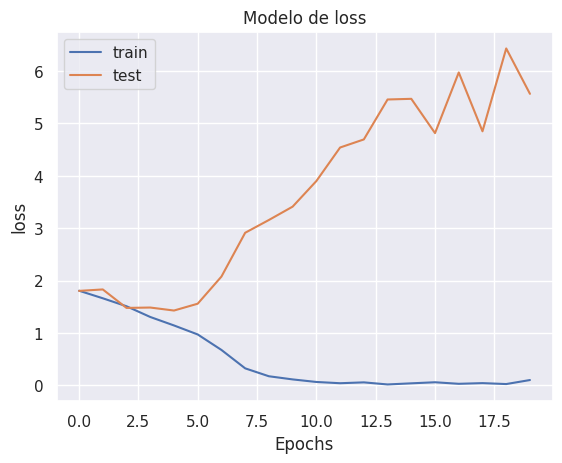

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title ('Modelo de loss')
plt.ylabel('loss')
plt.xlabel('Epochs')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

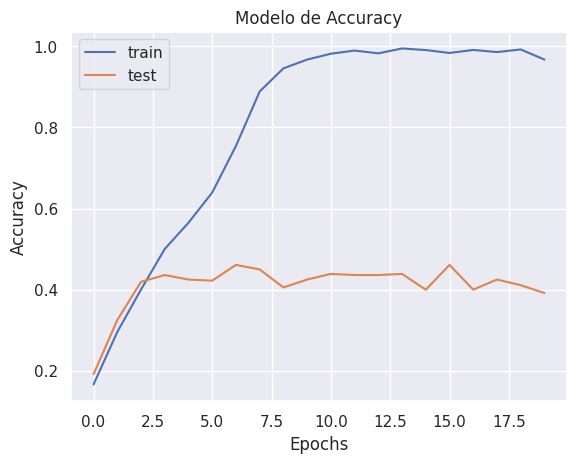

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title ('Modelo de Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

In [ ]:
a= [0,1,2,3,4,5]

In [ ]:
labels = le.inverse_transform(a)

In [ ]:
labels

array(['cycling', 'dancing', 'drinking', 'fighting', 'sitting',
       'sleeping'], dtype='<U8')

In [ ]:
cm = confusion_matrix(y_val_enco, predicciones.argmax(1))

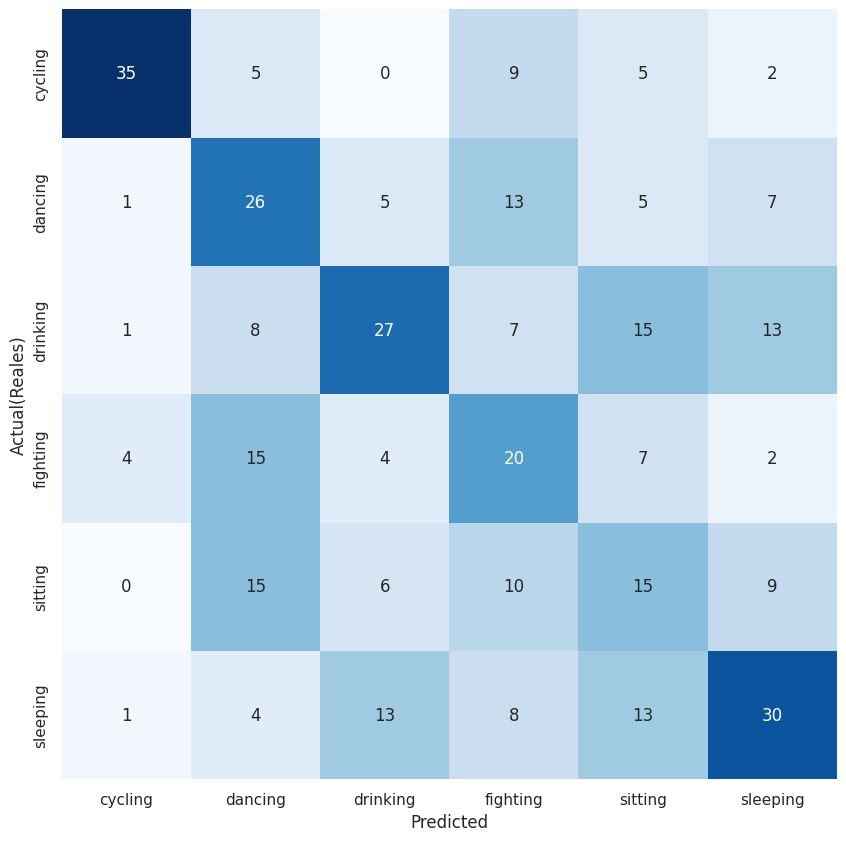

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(cm, cbar=False, xticklabels=labels, yticklabels=labels,fmt='d', annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual(Reales)')
plt.show()

In [ ]:
print(classification_report(y_val_enco, predicciones.argmax(1),target_names=labels))

              precision    recall  f1-score   support

     cycling       0.83      0.62      0.71        56
     dancing       0.36      0.46      0.40        57
    drinking       0.49      0.38      0.43        71
    fighting       0.30      0.38      0.34        52
     sitting       0.25      0.27      0.26        55
    sleeping       0.48      0.43      0.45        69

    accuracy                           0.42       360
   macro avg       0.45      0.43      0.43       360
weighted avg       0.46      0.42      0.43       360



**PUNTO 2B**

Los resultados obtenidos por este modelo de clasificación tiene un desempeño malo ya que al realizar la clasificacion de las metricas, estas son de bajo rendimiento; esto se puede validar al realizar un analisis para cada una de las metricas obtenidas por el modelo:

**Loss:** El valor del Loss es bastante alto, esto indica que el modelo tiene muchos problemas para realizar predicciones precisas, lo que significa que este necesita bastantes ajustes.

**Accuracy:** La precisión  del modelo es del 39%, esto indica que el modelo tiene muy pocas predicciones correctas, esto es relativamente bajo y esto supone que el modelo clasifica incorrectamente la mayoria de las muestras.

**Recall:** El recall muestra a detalle cada una de las clases que entrena el modelo, lo que se observa de esto, es que en la mayoria de estas; no se detectan de la forma correcta.

**F1-score:** El F1-score sugiere que el modelo está teniendo problemas para lograr un equilibrio entre la precisión y el recall en estas actividades.

A partir de las metricas analizadas se indica que el modelo necesita ajustes para ser mas preciso y efectivo en la clasificacion de estas clases.


#<font color='red'>Punto 3 (2.0). Usando métodos de regularización para mejorar el "***performance***" de su  modelo base.

(1.0) Usted podrá combinar diferentes métricas de regularización con el fin de obtener 3 modelos (**modelos regularizados**) que superen los resultados del modelo base.
<font color='red'> [Nota: Los 3 modelos deben mostrar graficos de Acurracy que corroboren la eliminación del overfitting. Tenga en cuenta además que los 3 modelos deberán mantener un Val-accuracy superior al 70%]

(0.25) Haciendo uso de transfer learning entrene un cuarto modelo. <font color='red'> [Nota: No olvide mostrar el grafico de Acurracy que corrobore la eliminación del overfitting y mantener un Val-accuracy superior al 70%]

(0.75) Realice un análisis comparativo de los resultados obtenidos con el mejor de los 3 modelos regularizados y el modelo 4.

In [ ]:
#Pegue y ejecute aquí su código para el punto 3.1


## Modelo 1 Drop Out

In [ ]:
num_classes = 6
y_train_ohe = keras.utils.to_categorical(y_train_enco, num_classes)
y_val_ohe = keras.utils.to_categorical(y_val_enco, num_classes)

In [ ]:
datagen = ImageDataGenerator(rotation_range = 25,
                             width_shift_range= 0.4,
                             height_shift_range= 0.3,
                             zoom_range = 0.6,
                             shear_range = 0.45,
                             horizontal_flip= True
                             )
datagen.fit(x_train)
iterator = datagen.flow(x_train, y_train_ohe, batch_size= 64)
muestras = x_train.shape[0] // 64



In [ ]:
entrada = LK.Input(shape=(100,100,3))
conv1 = LK.Conv2D(64,(3,3), padding='same',activation='relu')(entrada)
drop1 = LK.Dropout(0.2)(conv1)
conv2 = LK.Conv2D(64,(3,3), padding='same',activation='relu')(drop1)
drop2 = LK.Dropout(0.2)(conv2)
pool1 = LK.MaxPool2D((2,2),(2,2))(drop2)
conv3 = LK.Conv2D(120,(3,3), padding='same',activation='relu')(pool1)
drop3 = LK.Dropout(0.25)(conv3)
conv4 = LK.Conv2D(120,(3,3), padding='same',activation='relu')(drop3)
drop4 = LK.Dropout(0.2)(conv4)
pool2 = LK.MaxPool2D((2,2),(2,2))(drop4)
flat = LK.Flatten()(pool2)
fc1 = LK.Dense(120,activation='relu')(flat)
drop5 = LK.Dropout(0.2)(fc1)
fc2 = LK.Dense(80,activation='relu')(drop5)
drop6 = LK.Dropout(0.2)(fc2)
fc3 = LK.Dense(20,activation='relu')(drop6)
salida = LK.Dense(6, activation='softmax')(fc3)

modelo_dr = MK.Model(entrada,salida)
modelo_dr.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 100, 100, 64)      1792      
                                                                 
 dropout (Dropout)           (None, 100, 100, 64)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 64)      36928     
                                                                 
 dropout_1 (Dropout)         (None, 100, 100, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 50, 50, 64)        0         
 D)                                                              
                                                             

In [ ]:
modelo_dr.compile(optimizer='Adamax', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
ES = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=40, restore_best_weights=True)

In [ ]:
history_dr = modelo_dr.fit(iterator, steps_per_epoch=muestras,epochs=500, validation_data=(x_val,y_val_ohe),callbacks=[ES], verbose=1)
loss_dr, acc_dr = modelo_dr.evaluate(x_val,y_val_ohe, verbose=1)
print("Loss:{0} - Accuracy:{1}".format(loss_dr, acc_dr))

Epoch 1/500
50/50 [==============================] - 33s 294ms/step - loss: 1.8289 - accuracy: 0.1725 - val_loss: 1.7906 - val_accuracy: 0.1722
Epoch 2/500
50/50 [==============================] - 12s 234ms/step - loss: 1.7836 - accuracy: 0.1770 - val_loss: 1.7853 - val_accuracy: 0.2194
Epoch 3/500
50/50 [==============================] - 17s 335ms/step - loss: 1.7772 - accuracy: 0.1782 - val_loss: 1.7916 - val_accuracy: 0.1889
Epoch 4/500
50/50 [==============================] - 22s 438ms/step - loss: 1.7692 - accuracy: 0.2050 - val_loss: 1.7537 - val_accuracy: 0.2583
Epoch 5/500
50/50 [==============================] - 12s 242ms/step - loss: 1.7427 - accuracy: 0.2434 - val_loss: 1.7561 - val_accuracy: 0.2944
Epoch 6/500
50/50 [==============================] - 11s 225ms/step - loss: 1.7148 - accuracy: 0.2616 - val_loss: 1.7090 - val_accuracy: 0.3611
Epoch 7/500
50/50 [==============================] - 12s 232ms/step - loss: 1.6658 - accuracy: 0.2821 - val_loss: 1.7233 - val_accuracy:

In [ ]:
predicciones_dr = modelo_dr.predict(x_val)

12/12 [==============================] - 0s 13ms/step


In [ ]:
print(predicciones_dr.argmax(1))

[5 5 5 5 5 1 5 4 5 3 5 5 5 5 3 5 2 5 3 5 2 5 5 5 5 5 5 5 5 3 3 5 5 5 5 5 5
 5 5 5 5 5 5 5 4 2 5 5 5 5 0 5 2 5 5 5 3 4 5 2 5 5 2 2 5 4 2 5 2 2 2 2 4 4
 2 2 2 2 2 2 2 2 4 4 5 4 2 2 2 2 4 2 4 4 2 2 5 5 5 2 2 2 3 2 2 2 3 5 5 2 2
 3 2 2 4 4 2 2 5 2 2 2 2 3 2 2 2 2 4 2 3 5 3 3 3 3 3 3 3 3 3 4 3 0 4 1 3 3
 1 0 3 0 3 3 3 3 0 2 4 3 2 3 3 3 3 3 3 0 3 3 5 3 3 3 0 3 0 4 5 5 1 3 3 3 3
 3 3 3 3 3 3 4 3 3 2 1 3 0 3 3 4 1 1 1 1 1 2 1 3 1 1 1 1 2 3 3 1 3 1 4 3 1
 1 5 2 1 1 1 1 1 1 1 1 1 1 1 2 1 3 2 0 1 4 1 1 3 1 1 1 1 2 0 4 3 5 3 0 0 2
 5 4 3 4 4 4 4 4 4 1 2 4 4 4 4 4 4 4 2 4 4 4 3 4 0 4 5 4 4 0 4 4 4 5 4 4 4
 4 4 0 4 4 4 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0]


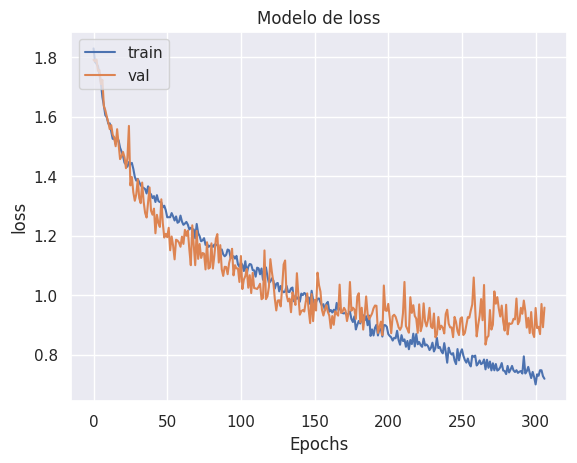

In [ ]:
plt.plot(history_dr.history['loss'])
plt.plot(history_dr.history['val_loss'])
plt.title ('Modelo de loss')
plt.ylabel('loss')
plt.xlabel('Epochs')
plt.legend(['train','val'], loc = 'upper left')
plt.show()

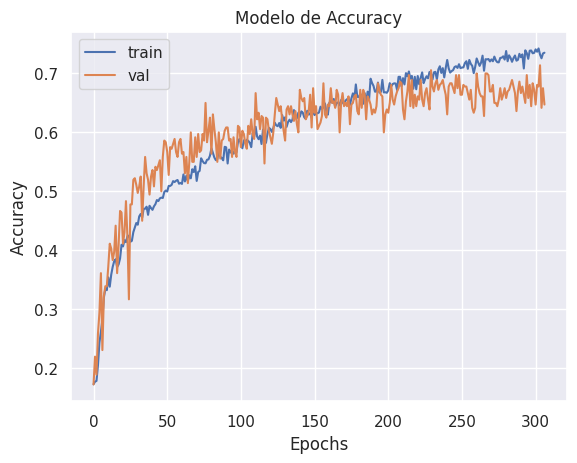

In [ ]:
plt.plot(history_dr.history['accuracy'])
plt.plot(history_dr.history['val_accuracy'])
plt.title ('Modelo de Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train','val'], loc = 'upper left')
plt.show()

In [ ]:
a= [0,1,2,3,4,5]

In [ ]:
labels = le.inverse_transform(a)

In [ ]:
labels

array(['cycling', 'dancing', 'drinking', 'fighting', 'sitting',
       'sleeping'], dtype='<U8')

In [ ]:
cm_dr = confusion_matrix(y_val_enco, predicciones_dr.argmax(1))

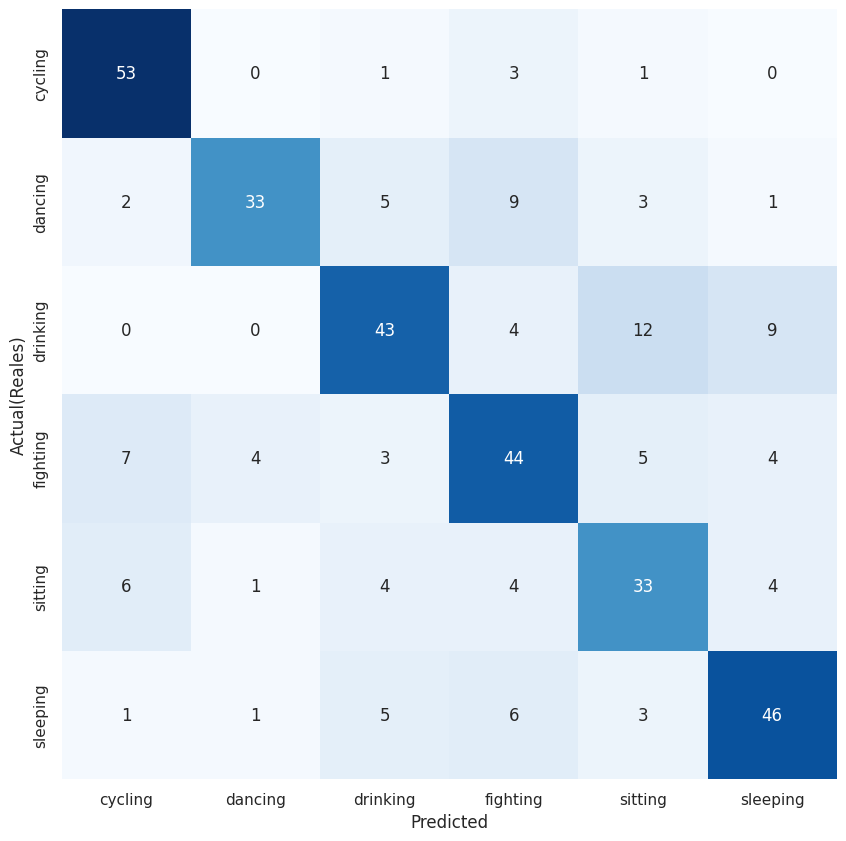

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(cm_dr, cbar=False, xticklabels=labels, yticklabels=labels,fmt='d', annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual(Reales)')
plt.show()

In [ ]:
print(classification_report(y_val_enco, predicciones_dr.argmax(1),target_names=labels))

              precision    recall  f1-score   support

     cycling       0.77      0.91      0.83        58
     dancing       0.85      0.62      0.72        53
    drinking       0.70      0.63      0.67        68
    fighting       0.63      0.66      0.64        67
     sitting       0.58      0.63      0.61        52
    sleeping       0.72      0.74      0.73        62

    accuracy                           0.70       360
   macro avg       0.71      0.70      0.70       360
weighted avg       0.71      0.70      0.70       360



## Modelo 2 l2

In [ ]:
num_classes = 6
y_train_ohe = keras.utils.to_categorical(y_train_enco, num_classes)
y_val_ohe = keras.utils.to_categorical(y_val_enco, num_classes)

In [ ]:
datagen = ImageDataGenerator(rotation_range = 20,
                             width_shift_range= 0.2,
                             height_shift_range= 0.2,
                             zoom_range = 0.2,
                             shear_range = 0.2,
                             horizontal_flip= True
                             )
datagen.fit(x_train)
iterator = datagen.flow(x_train, y_train_ohe, batch_size= 64)
muestras = x_train.shape[0] // 64



In [ ]:
entrada = LK.Input(shape=(100,100,3))
conv1 = LK.Conv2D(64,(3,3), padding='same',activation='relu',kernel_regularizer=L2(0.001))(entrada)
conv2 = LK.Conv2D(64,(3,3), padding='same',activation='relu',kernel_regularizer=L2(0.001))(conv1)
pool1 = LK.MaxPool2D((2,2),(2,2))(conv2)
conv3 = LK.Conv2D(120,(3,3), padding='same',activation='relu',kernel_regularizer=L2(0.001))(pool1)
conv4 = LK.Conv2D(120,(3,3), padding='same',activation='relu',kernel_regularizer=L2(0.001))(conv3)
pool2 = LK.MaxPool2D((2,2),(2,2))(conv4)
flat = LK.Flatten()(pool2)
fc1 = LK.Dense(120,activation='relu',kernel_regularizer=L2(0.001))(flat)
fc2 = LK.Dense(80,activation='relu',kernel_regularizer=L2(0.001))(fc1)
fc3 = LK.Dense(20,activation='relu',kernel_regularizer=L2(0.001))(fc2)
salida = LK.Dense(6, activation='softmax')(fc3)

modelo_Da = MK.Model(entrada,salida)
modelo_Da.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 100, 100, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 50, 50, 64)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 50, 120)       69240     
                                                                 
 conv2d_3 (Conv2D)           (None, 50, 50, 120)       129720    
                                                             

In [ ]:
modelo_Da.compile(optimizer="Adamax", loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
num_classes = 6
y_train_ohe = keras.utils.to_categorical(y_train_enco, num_classes)
y_test_ohe = keras.utils.to_categorical(y_val_enco, num_classes)

In [ ]:
datagen = ImageDataGenerator(rotation_range = 30,
                             width_shift_range= 0.4,
                             height_shift_range= 0.4,
                             zoom_range = 0.2,
                             shear_range = 0.2,
                             horizontal_flip= True
                             )
datagen.fit(x_train)
iterator = datagen.flow(x_train, y_train_ohe, batch_size= 64)
muestras = x_train.shape[0] // 64



In [ ]:
ES = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

In [ ]:
history_Da= modelo_Da.fit(iterator, steps_per_epoch=muestras,epochs=500, validation_data=(x_val,y_test_ohe), callbacks=[ES], verbose=1)
loss, acc = modelo_Da.evaluate(x_val,y_test_ohe, verbose=1)
print("Loss:{0} - Accuracy:{1}".format(loss, acc))

Epoch 1/500
50/50 [==============================] - 27s 266ms/step - loss: 2.2055 - accuracy: 0.1792 - val_loss: 2.0760 - val_accuracy: 0.1861
Epoch 2/500
50/50 [==============================] - 11s 212ms/step - loss: 2.0184 - accuracy: 0.2406 - val_loss: 1.9407 - val_accuracy: 0.2611
Epoch 3/500
50/50 [==============================] - 11s 214ms/step - loss: 1.9184 - accuracy: 0.2774 - val_loss: 1.9388 - val_accuracy: 0.2583
Epoch 4/500
50/50 [==============================] - 11s 219ms/step - loss: 1.8947 - accuracy: 0.2960 - val_loss: 1.8565 - val_accuracy: 0.3056
Epoch 5/500
50/50 [==============================] - 11s 214ms/step - loss: 1.8294 - accuracy: 0.3271 - val_loss: 1.9591 - val_accuracy: 0.2667
Epoch 6/500
50/50 [==============================] - 10s 198ms/step - loss: 1.8007 - accuracy: 0.3369 - val_loss: 1.9020 - val_accuracy: 0.3139
Epoch 7/500
50/50 [==============================] - 10s 201ms/step - loss: 1.7594 - accuracy: 0.3583 - val_loss: 1.7434 - val_accuracy:

<function matplotlib.pyplot.show(close=None, block=None)>

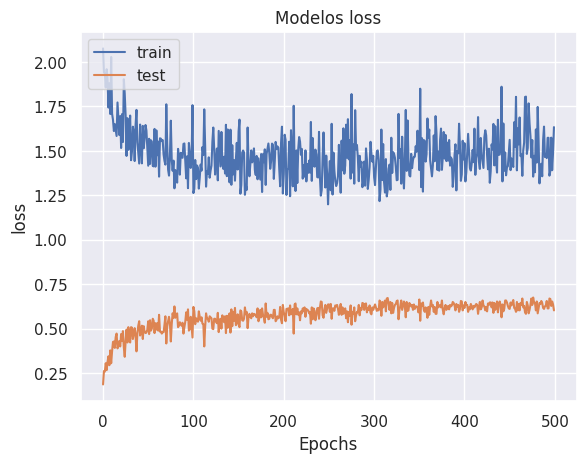

In [ ]:
plt.plot(history_Da.history['val_loss'])
plt.plot(history_Da.history['val_accuracy'])
plt.title('Modelos loss')
plt.ylabel('loss')
plt.xlabel('Epochs')
plt.legend(['train','test'],loc = 'upper left')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

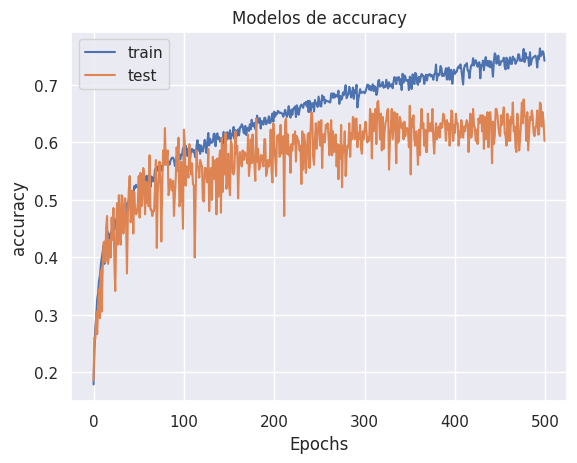

In [ ]:
plt.plot(history_Da.history['accuracy'])
plt.plot(history_Da.history['val_accuracy'])
plt.title('Modelos de accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epochs')
plt.legend(['train','test'],loc = 'upper left')
plt.show

In [ ]:
predicciones_Da = modelo_Da.predict(x_val)

12/12 [==============================] - 0s 18ms/step


In [ ]:
print(predicciones_Da.argmax(1))

[3 1 1 1 4 2 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 2 1 1 4 1 2 1 0 1 5 1 1 1
 1 1 1 1 5 1 1 1 1 1 2 1 1 1 4 5 1 1 1 1 1 1 1 1 1 4 1 1 3 0 4 3 0 5 4 0 1
 1 1 5 1 4 0 5 0 1 0 1 1 1 3 4 5 0 5 1 3 1 3 1 1 0 2 3 3 3 0 1 3 4 0 0 1 2
 4 3 0 1 5 0 1 3 0 0 5 5 5 5 1 5 1 0 5 2 5 4 5 5 5 2 5 5 2 5 2 5 5 5 5 5 5
 1 5 0 0 5 4 5 5 5 1 2 5 5 5 5 5 4 5 0 5 5 4 5 5 0 3 5 2 2 5 0 1 0 2 4 2 5
 5 0 2 0 2 2 2 2 4 2 2 2 2 0 1 2 5 2 2 2 2 2 2 2 5 5 2 4 4 1 2 0 2 5 2 1 4
 2 4 2 2 2 2 2 5 2 2 0 2 4 0 5 4 5 4 4 4 4 4 1 4 4 0 0 4 4 0 4 1 4 4 5 2 0
 4 2 4 0 1 0 4 4 4 0 4 0 2 4 0 2 2 1 4 4 4 1 2 0 4 4 4 4 0 4 4 0 4 1 4 4 0
 4 4 4 5 0 4 4 4 4 4 4 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
a= [0,1,2,3,4,5]

In [ ]:
labels = le.inverse_transform(a)

In [ ]:
labels

array(['cycling', 'dancing', 'drinking', 'fighting', 'sitting',
       'sleeping'], dtype='<U8')

In [ ]:
cm_Da = confusion_matrix(y_val_enco, predicciones_Da.argmax(1))

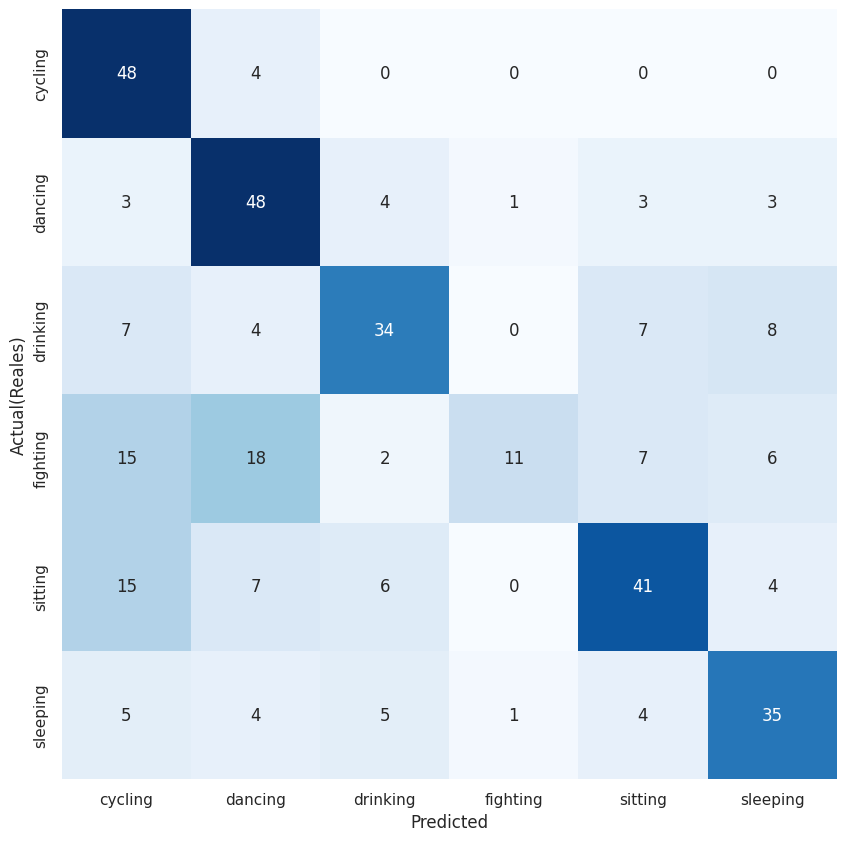

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(cm_Da, cbar=False, xticklabels=labels, yticklabels=labels,fmt='d', annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual(Reales)')
plt.show()

In [ ]:
print(classification_report(y_val_enco, predicciones_Da.argmax(1),target_names=labels))

              precision    recall  f1-score   support

     cycling       0.52      0.92      0.66        52
     dancing       0.56      0.77      0.65        62
    drinking       0.67      0.57      0.61        60
    fighting       0.85      0.19      0.31        59
     sitting       0.66      0.56      0.61        73
    sleeping       0.62      0.65      0.64        54

    accuracy                           0.60       360
   macro avg       0.65      0.61      0.58       360
weighted avg       0.65      0.60      0.58       360



## Modelo 3 l2 + dropup

In [ ]:
num_classes = 6
y_train_ohe = keras.utils.to_categorical(y_train_enco, num_classes)
y_val_ohe = keras.utils.to_categorical(y_val_enco, num_classes)

In [ ]:
datagen = ImageDataGenerator(rotation_range = 20,
                             width_shift_range= 0.2,
                             height_shift_range= 0.2,
                             zoom_range = 0.2,
                             shear_range = 0.2,
                             horizontal_flip= True
                             )
datagen.fit(x_train)
iterator = datagen.flow(x_train, y_train_ohe, batch_size= 64)
muestras = x_train.shape[0] // 64



In [ ]:
entrada = LK.Input(shape=(100,100,3))
conv1 = LK.Conv2D(64,(3,3), padding='same',activation='relu',kernel_regularizer=L2(0.001))(entrada)
drop1 = LK.Dropout(0.2)(conv1)
conv2 = LK.Conv2D(64,(3,3), padding='same',activation='relu',kernel_regularizer=L2(0.001))(drop1)
drop2 = LK.Dropout(0.2)(conv2)
pool1 = LK.MaxPool2D((2,2),(2,2))(drop2)
conv3 = LK.Conv2D(120,(3,3), padding='same',activation='relu',kernel_regularizer=L2(0.001))(pool1)
drop3 = LK.Dropout(0.25)(conv3)
conv4 = LK.Conv2D(120,(3,3), padding='same',activation='relu',kernel_regularizer=L2(0.001))(drop3)
drop4 = LK.Dropout(0.2)(conv4)
pool2 = LK.MaxPool2D((2,2),(2,2))(drop4)
flat = LK.Flatten()(pool2)
fc1 = LK.Dense(120,activation='relu',kernel_regularizer=L2(0.001))(flat)
drop5 = LK.Dropout(0.2)(fc1)
fc2 = LK.Dense(80,activation='relu',kernel_regularizer=L2(0.001))(drop5)
drop6 = LK.Dropout(0.2)(fc2)
fc3 = LK.Dense(20,activation='relu',kernel_regularizer=L2(0.001))(drop6)
salida = LK.Dense(6, activation='softmax')(fc3)

modelo3 = MK.Model(entrada,salida)

In [ ]:
modelo3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
ES = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

In [ ]:
history3= modelo3.fit(iterator, steps_per_epoch=muestras,epochs=500, validation_data=(x_val,y_val_ohe),callbacks=[ES], verbose=1)
loss, acc = modelo3.evaluate(x_val,y_val_ohe, verbose=1)
print("Loss:{0} - Accuracy:{1}".format(loss, acc))

Epoch 1/500
50/50 [==============================] - 11s 224ms/step - loss: 1.3229 - accuracy: 0.5164 - val_loss: 1.3943 - val_accuracy: 0.5250
Epoch 2/500
50/50 [==============================] - 11s 221ms/step - loss: 1.3156 - accuracy: 0.5324 - val_loss: 1.3204 - val_accuracy: 0.5250
Epoch 3/500
50/50 [==============================] - 11s 222ms/step - loss: 1.3131 - accuracy: 0.5195 - val_loss: 1.3355 - val_accuracy: 0.4944
Epoch 4/500
50/50 [==============================] - 11s 223ms/step - loss: 1.3355 - accuracy: 0.5148 - val_loss: 1.3529 - val_accuracy: 0.5361
Epoch 5/500
50/50 [==============================] - 12s 231ms/step - loss: 1.3193 - accuracy: 0.5236 - val_loss: 1.4594 - val_accuracy: 0.4778
Epoch 6/500
50/50 [==============================] - 12s 245ms/step - loss: 1.3286 - accuracy: 0.5192 - val_loss: 1.4157 - val_accuracy: 0.4778
Epoch 7/500
50/50 [==============================] - 11s 220ms/step - loss: 1.3158 - accuracy: 0.5290 - val_loss: 1.3940 - val_accuracy:

In [ ]:
predicciones3 = modelo3.predict(x_val)

12/12 [==============================] - 0s 17ms/step


In [ ]:
print(predicciones3.argmax(1))

[3 1 1 1 0 2 1 1 3 2 5 3 1 1 1 1 1 1 0 1 3 3 1 2 4 1 1 4 1 5 1 1 1 1 0 1 1
 5 1 1 1 2 1 1 1 3 1 2 1 1 1 2 3 1 1 1 2 3 5 3 1 1 3 3 3 3 3 3 3 0 3 4 0 1
 3 3 3 3 0 0 3 0 4 0 3 1 1 3 3 5 0 3 1 3 3 3 3 1 0 0 3 3 1 3 0 3 3 3 0 3 3
 3 3 1 3 3 0 1 3 0 3 5 5 4 1 1 5 0 0 2 2 5 3 2 2 5 3 4 2 4 4 5 5 5 5 2 4 5
 0 1 0 0 5 2 5 1 5 5 2 3 1 2 2 2 4 3 0 5 5 3 5 2 0 3 3 2 2 2 0 1 4 2 2 2 2
 2 0 2 0 5 2 2 2 3 2 2 3 2 2 3 2 5 2 4 2 2 2 2 0 2 5 2 4 2 2 2 3 2 2 2 3 2
 2 4 4 5 2 2 2 2 2 2 0 2 2 0 4 0 3 4 4 3 0 0 1 0 4 0 4 4 3 0 3 0 0 0 3 2 0
 3 0 4 0 2 4 3 0 4 0 0 0 2 4 3 4 3 2 0 0 4 1 2 3 4 4 0 4 4 0 0 0 1 3 0 3 0
 4 3 0 3 0 4 4 2 4 0 4 3 0 0 1 0 0 0 0 0 0 0 0 0 0 0 4 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


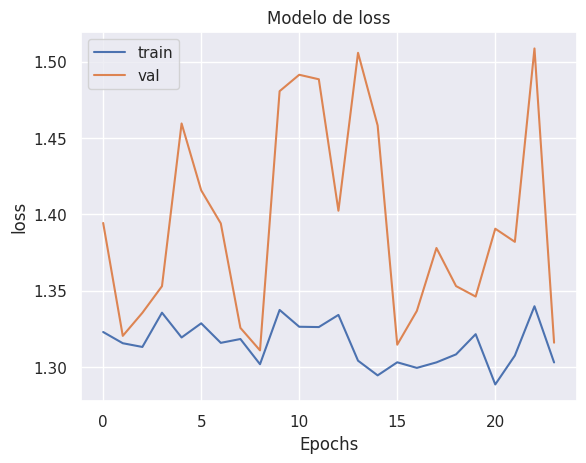

In [ ]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title ('Modelo de loss')
plt.ylabel('loss')
plt.xlabel('Epochs')
plt.legend(['train','val'], loc = 'upper left')
plt.show()

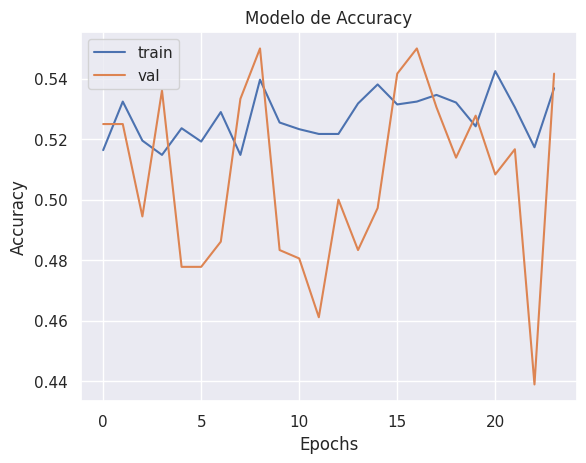

In [ ]:
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title ('Modelo de Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train','val'], loc = 'upper left')
plt.show()

In [ ]:
a= [0,1,2,3,4,5]

In [ ]:
labels = le.inverse_transform(a)

In [ ]:
labels

array(['cycling', 'dancing', 'drinking', 'fighting', 'sitting',
       'sleeping'], dtype='<U8')

In [ ]:
cm3 = confusion_matrix(y_val_enco, predicciones3.argmax(1))

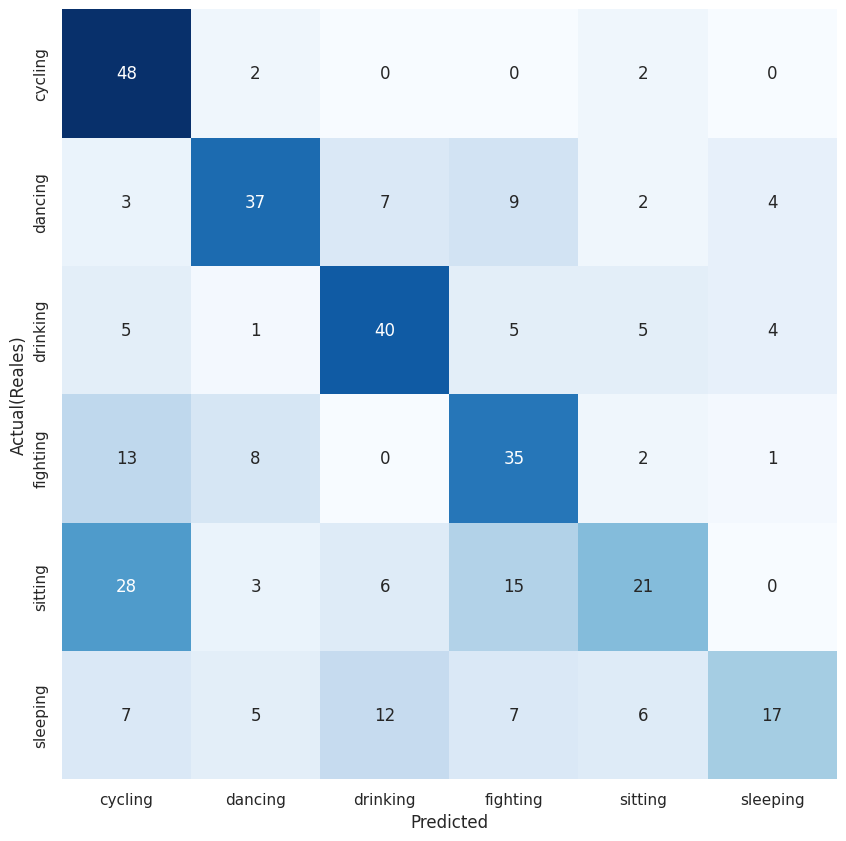

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(cm3, cbar=False, xticklabels=labels, yticklabels=labels,fmt='d', annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual(Reales)')
plt.show()

In [ ]:
print(classification_report(y_val_enco, predicciones3.argmax(1),target_names=labels))

              precision    recall  f1-score   support

     cycling       0.46      0.92      0.62        52
     dancing       0.66      0.60      0.63        62
    drinking       0.62      0.67      0.64        60
    fighting       0.49      0.59      0.54        59
     sitting       0.55      0.29      0.38        73
    sleeping       0.65      0.31      0.43        54

    accuracy                           0.55       360
   macro avg       0.57      0.56      0.54       360
weighted avg       0.57      0.55      0.53       360



In [ ]:
#Pegue y ejecute aquí su código para el punto 3.2

## Modelo 4 TRASNFER LEARNING Punto 3.2


In [ ]:
num_classes = 6
y_train_ohe = keras.utils.to_categorical(y_train_enco, num_classes)
y_val_ohe = keras.utils.to_categorical(y_val_enco, num_classes)

In [ ]:
datagen = ImageDataGenerator(rotation_range = 20,
                             width_shift_range= 0.2,
                             height_shift_range= 0.2,
                             zoom_range = 0.2,
                             shear_range = 0.2,
                             horizontal_flip= True
                             )
datagen.fit(x_train)
iterator = datagen.flow(x_train, y_train_ohe, batch_size= 64)
muestras = x_train.shape[0] // 64



In [ ]:
vgg_model = Sequential()

modelo_preentrenado= tf.keras.applications.VGG16(include_top=False,
                   input_shape=(100,100,3),
                   pooling='avg',classes=6,
                   weights='imagenet')

In [ ]:
input = modelo_preentrenado.output
drop = LK.Dropout(0.2)(input)
flat = LK.Flatten()(drop)
fc1= LK.Dense(120,activation='relu')(flat)
drop1 = LK.Dropout(0.2)(fc1)
fc2 = LK.Dense(80, activation='relu')(drop1)
drop2 = LK.Dropout(0.2)(fc1)
fc3 = LK.Dense(20, activation='relu')(drop2)
salida = LK.Dense(6, activation='softmax')(fc2)
modelo = MK.Model(inputs=modelo_preentrenado.input, outputs= salida)
modelo.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 100, 100, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 100, 100, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 50, 50, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 50, 50, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 50, 50, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 25, 25, 128)       0   

In [ ]:
modelo_preentrenado.trainable = False #si no desea entrenar las capas convolucionales
""" En el caso de que usted decida entrenar lagunas de las capas convolucionales (Ojo: esto obliga a conocer el modelo)
  #for capa in modelo_base.layers[:??]:
   # capa.trainable=False """


' En el caso de que usted decida entrenar lagunas de las capas convolucionales (Ojo: esto obliga a conocer el modelo)\n  #for capa in modelo_base.layers[:??]:\n   # capa.trainable=False '

In [ ]:
modelo.compile(optimizer='Adamax', loss="categorical_crossentropy", metrics =['accuracy'])

In [ ]:
ES = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

In [ ]:
history_transfer = modelo.fit(iterator, steps_per_epoch=muestras,epochs=500, validation_data=(x_val,y_val_ohe), callbacks=[ES], verbose=1)
loss_transfer,acc_transfer = modelo.evaluate(x_val,y_val_ohe,verbose=1)
print("Loss:{0} - Accuracy:{1}".format(loss_transfer,acc_transfer))


Epoch 1/500
50/50 [==============================] - 13s 212ms/step - loss: 1.7620 - accuracy: 0.2317 - val_loss: 1.6084 - val_accuracy: 0.4389
Epoch 2/500
50/50 [==============================] - 10s 209ms/step - loss: 1.6194 - accuracy: 0.3479 - val_loss: 1.4593 - val_accuracy: 0.4861
Epoch 3/500
50/50 [==============================] - 11s 227ms/step - loss: 1.5179 - accuracy: 0.3926 - val_loss: 1.3321 - val_accuracy: 0.5167
Epoch 4/500
50/50 [==============================] - 9s 189ms/step - loss: 1.4203 - accuracy: 0.4405 - val_loss: 1.2518 - val_accuracy: 0.5417
Epoch 5/500
50/50 [==============================] - 11s 221ms/step - loss: 1.3786 - accuracy: 0.4660 - val_loss: 1.2226 - val_accuracy: 0.5694
Epoch 6/500
50/50 [==============================] - 21s 417ms/step - loss: 1.3392 - accuracy: 0.4861 - val_loss: 1.1991 - val_accuracy: 0.5694
Epoch 7/500
50/50 [==============================] - 12s 241ms/step - loss: 1.3167 - accuracy: 0.4887 - val_loss: 1.1473 - val_accuracy: 

In [ ]:
predicciones = modelo.predict(x_val)

12/12 [==============================] - 0s 34ms/step


In [ ]:
print(predicciones.argmax(1))

[5 5 5 0 0 5 5 5 5 5 5 5 5 5 5 1 4 0 5 3 5 5 5 5 4 0 5 1 5 5 5 4 1 5 5 5 5
 5 3 5 5 5 5 5 5 5 0 5 5 5 3 5 5 5 0 5 5 1 5 5 2 5 5 5 3 4 5 5 5 0 3 0 0 1
 0 0 2 0 4 0 0 3 0 0 0 0 4 0 0 0 0 1 0 0 0 3 3 4 0 3 0 4 0 0 0 1 0 5 0 0 0
 0 3 0 4 0 1 0 0 0 0 0 1 0 4 2 2 2 0 2 4 2 4 4 4 2 4 2 0 1 2 4 4 4 5 3 4 2
 2 2 5 2 4 2 2 2 2 2 2 0 2 5 5 5 2 2 2 2 3 4 4 2 2 2 2 2 2 4 2 2 2 2 2 5 2
 0 2 2 2 5 5 4 4 2 2 2 3 4 3 3 0 2 5 3 3 5 4 3 3 4 3 5 3 3 1 3 4 3 3 3 3 4
 3 3 3 3 1 3 3 0 3 4 1 5 3 3 3 3 3 3 3 3 3 3 3 3 0 0 4 3 4 4 4 5 2 3 1 3 4
 1 4 4 5 4 4 4 0 3 1 4 4 4 4 4 4 4 4 0 5 4 3 4 3 0 4 4 4 4 4 5 4 1 1 4 4 4
 4 3 4 5 4 5 2 1 1 1 1 3 3 1 1 1 1 1 1 1 0 1 4 2 1 3 0 1 4 1 3 1 1 4 1 1 1
 1 3 3 1 1 0 3 1 3 1 1 1 3 0 4 1 1 3 1 1 1 1 3 3 3 1 4]


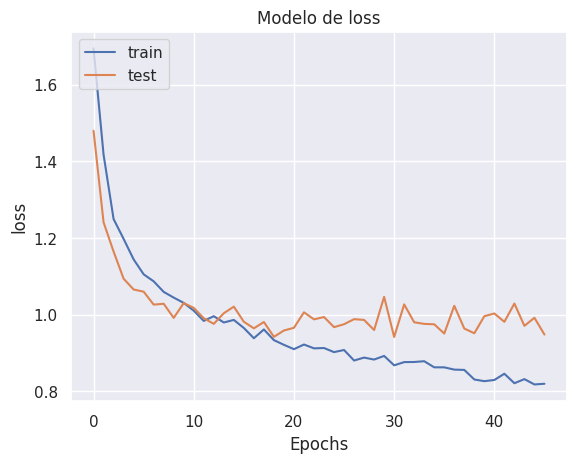

In [ ]:
plt.plot(history_transfer.history['loss'])
plt.plot(history_transfer.history['val_loss'])
plt.title ('Modelo de loss')
plt.ylabel('loss')
plt.xlabel('Epochs')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

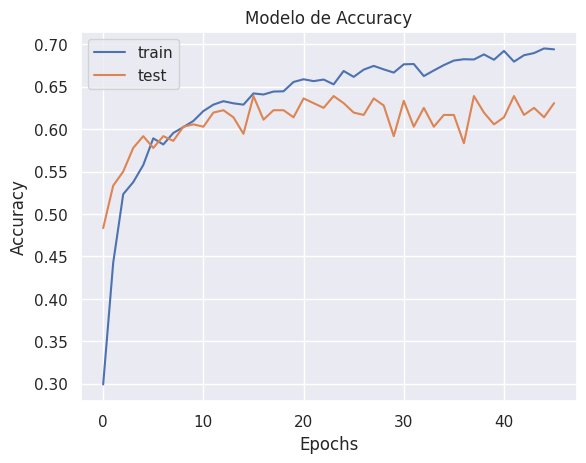

In [ ]:
plt.plot(history_transfer.history['accuracy'])
plt.plot(history_transfer.history['val_accuracy'])
plt.title ('Modelo de Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

In [ ]:
a= [0,1,2,3,4,5]

In [ ]:
labels = le.inverse_transform(a)

In [ ]:
labels

array(['cycling', 'dancing', 'drinking', 'fighting', 'sitting',
       'sleeping'], dtype='<U8')

In [ ]:
cm = confusion_matrix(y_val_enco, predicciones.argmax(1))

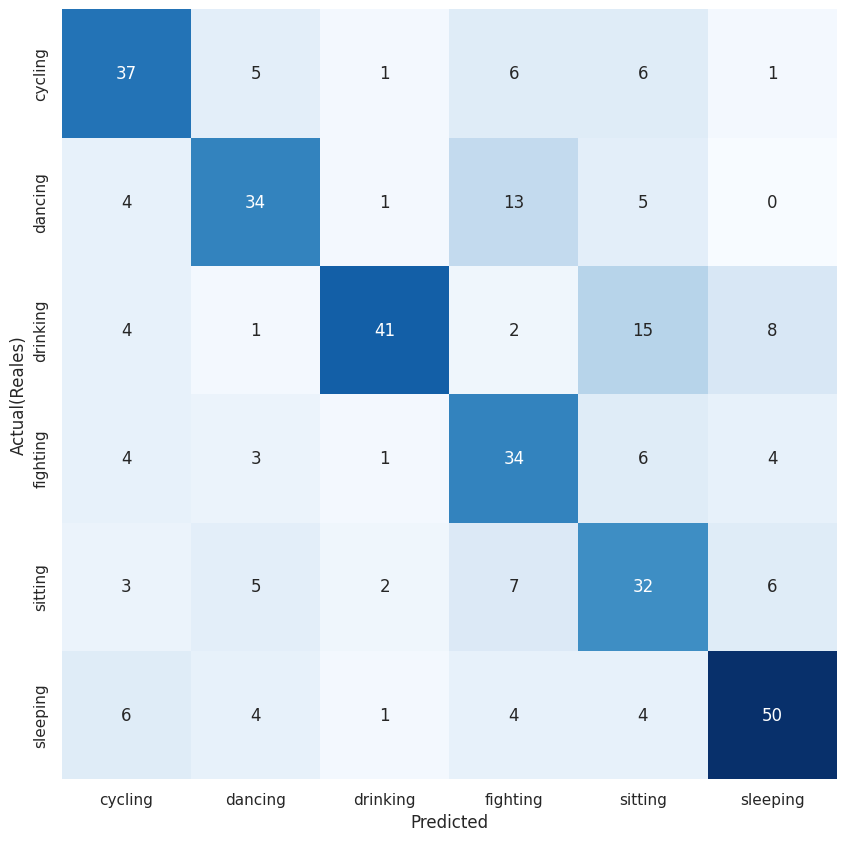

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(cm, cbar=False, xticklabels=labels, yticklabels=labels,fmt='d', annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual(Reales)')
plt.show()

In [ ]:
print(classification_report(y_val_enco, predicciones.argmax(1),target_names=labels))

              precision    recall  f1-score   support

     cycling       0.64      0.66      0.65        56
     dancing       0.65      0.60      0.62        57
    drinking       0.87      0.58      0.69        71
    fighting       0.52      0.65      0.58        52
     sitting       0.47      0.58      0.52        55
    sleeping       0.72      0.72      0.72        69

    accuracy                           0.63       360
   macro avg       0.65      0.63      0.63       360
weighted avg       0.66      0.63      0.64       360



##punto 3c

(0.25) Edite aqui el analisis del punto 3.3

Se realiza el análisis entre los modelos los cuales fueron el modelo dropout y el modelo 4(transfer Learning) ya que en el modelo dropout fue el mejor entre los tres entrenados, por sus métricas.

•	Como se pudo observar con respecto al Loss el modelo 4 muestra una perdida menor en comparación del otro modelo, esto indica que este se ajusta mejor a los datos de entrenamiento y tiene un mejor rendimiento a la hora de realizar su tarea.

                              Modelo 1: 1.0125
                              Modelo 4: 0.9429

•	En el Accuracy el modelo 1 supera al modelo 4 en términos de precisión, aunque la diferencia de ambos no es tan grande, significa que el modelo 1 clasifica correctamente un poco mas las muestras del conjunto de pruebas

                              Modelo 1: 63.89%
                              Modelo 4: 62.78%

•	En las métricas de Clasificación (precisión, recall, f1-score): El modelo 1 tiende a ser mas preciso en general, lo que indica que clasifica correctamente mas muestras en cada clase, esto aporta mucho a la hora de evitar los falsos positivos de los modelos; aunque en algunas clases el modelo 4 tiende a obtener un rendimiento ligeramente mejor en algunas clases, se somete a que la precisión sea ligeramente menor.

Teniendo en cuenta lo anterior el modelo 1 puede ser preferible si se busca tener un equilibrio mejor entre las métricas o se quiere priorizar en la detección de algunas clases.


# <font color='red'>Punto 4 (1.0). Comprendiendo mejor su Clasificador</font>.

A partir de la lectura juiciosa de este enlace: [VISUALIZING FEATURE MAPS](https://machinelearningmastery.com/how-to-visualize-filters-and-feature-maps-in-convolutional-neural-networks/).

Realice una comparación visual de las diferentes capas convolucionales (entendiendo que estas, son las que producen los diferentes feature maps).<font color='red'>[Nota: Para esta parte, utilice el conjunto de datos de TEST]</font>.

Acompañe esta comparación visual con un párrafo donde muestre su análisis al respecto.


In [ ]:
#Pegue y ejecute aquí su código.
model = modelo_dr
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 100, 100, 64)      1792      
                                                                 
 dropout (Dropout)           (None, 100, 100, 64)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 64)      36928     
                                                                 
 dropout_1 (Dropout)         (None, 100, 100, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 50, 50, 64)        0         
 D)                                                              
                                                             

In [ ]:
img = test[1]

In [ ]:
img.shape

(100, 100, 3)

In [ ]:
img = expand_dims(img,0)

Esta sección de código se utiliza para inspeccionar y mostrar información sobre los filtros y sesgos de una capa específica de un modelo de red neuronal, en este caso, la segunda capa del modelo. Esta información es útil para comprender cómo está configurada y cómo se están utilizando las capas en el modelo.

In [ ]:
layer = model.layers #Conv layers
filters, biases = model.layers[1].get_weights()
print(layer[1].name, filters.shape)


conv2d (3, 3, 3, 64)


La seccion siguiente muestra una cuadrícula de 8x8 que contiene visualizaciones de filtros individuales de una capa convolucional en una red neuronal. Cada filtro se muestra en escala de grises en su propia celda del subplot, lo que facilita la inspección visual de cómo los filtros aprenden diferentes características en los datos de entrada.

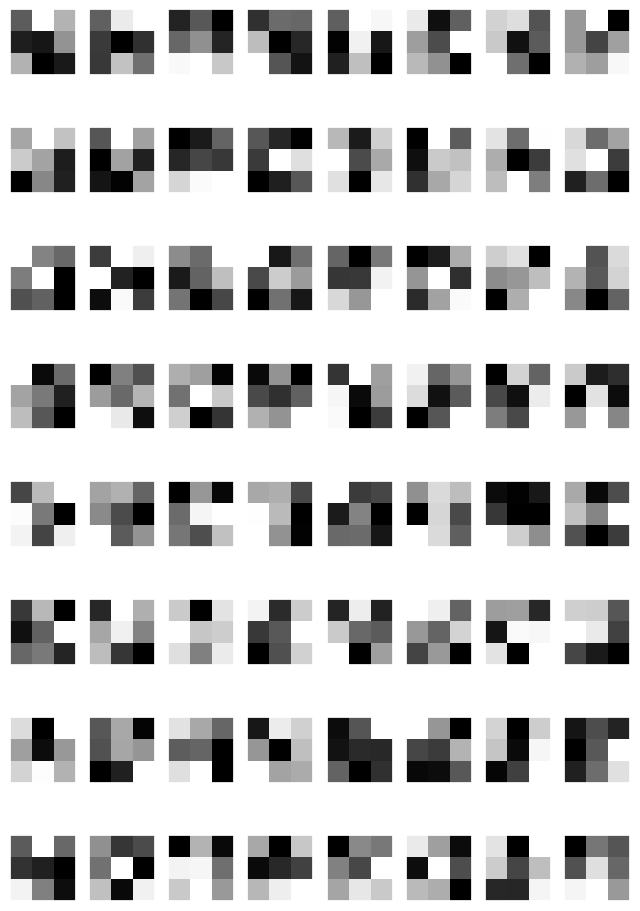

In [ ]:
fig1=plt.figure(figsize=(8, 12))
columns = 8
rows = 8
n_filters = columns * rows
for i in range(1, n_filters +1):
    f = filters[:, :, :, i-1]
    fig1 =plt.subplot(rows, columns, i)
    fig1.set_xticks([])  #Turn off axis
    fig1.set_yticks([])
    plt.imshow(f[:, :, 0], cmap='gray') #Show only the filters from 0th channel (R)
    #ix += 1
plt.show()

En la seccion de código siguiente se crea un nuevo modelo llamado model_short que toma las mismas entradas que el modelo original, pero produce como salidas las activaciones de las capas convolucionales específicas que se han seleccionado. Esto puede ser útil para realizar visualizaciones intermedias o análisis de características en estas capas específicas sin necesidad de entrenar el modelo completo. El print(model_short.summary()) muestra la estructura del nuevo modelo en términos de capas y dimensiones de salida.

In [ ]:
conv_layer_index = [1, 3, 6,8]
outputs = [model.layers[i].output for i in conv_layer_index]
model_short = Model(inputs=model.inputs, outputs=outputs)
print(model_short.summary())

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 100, 100, 64)      1792      
                                                                 
 dropout (Dropout)           (None, 100, 100, 64)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 64)      36928     
                                                                 
 dropout_1 (Dropout)         (None, 100, 100, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 50, 50, 64)        0         
 D)                                                              
                                                           

In [ ]:
feature_output = model_short.predict(img)

1/1 [==============================] - 0s 72ms/step


En esta seccion se muestra las capas convoluciones de la red

In [ ]:
for i in range(len(model.layers)):
    # check for convolutional layer
    if 'conv' not in model.layers[i].name:
        continue
    # get filter weights
    filters, biases = model.layers[i].get_weights()
    print("layer number",i,model.layers[i].name, filters.shape)

layer number 1 conv2d (3, 3, 3, 64)
layer number 3 conv2d_1 (3, 3, 64, 64)
layer number 6 conv2d_2 (3, 3, 64, 120)
layer number 8 conv2d_3 (3, 3, 120, 120)


In [ ]:
layer_index =[1,3,6,8]

En esta seccion se imprime las salidas de los filtros de cada una de las capas

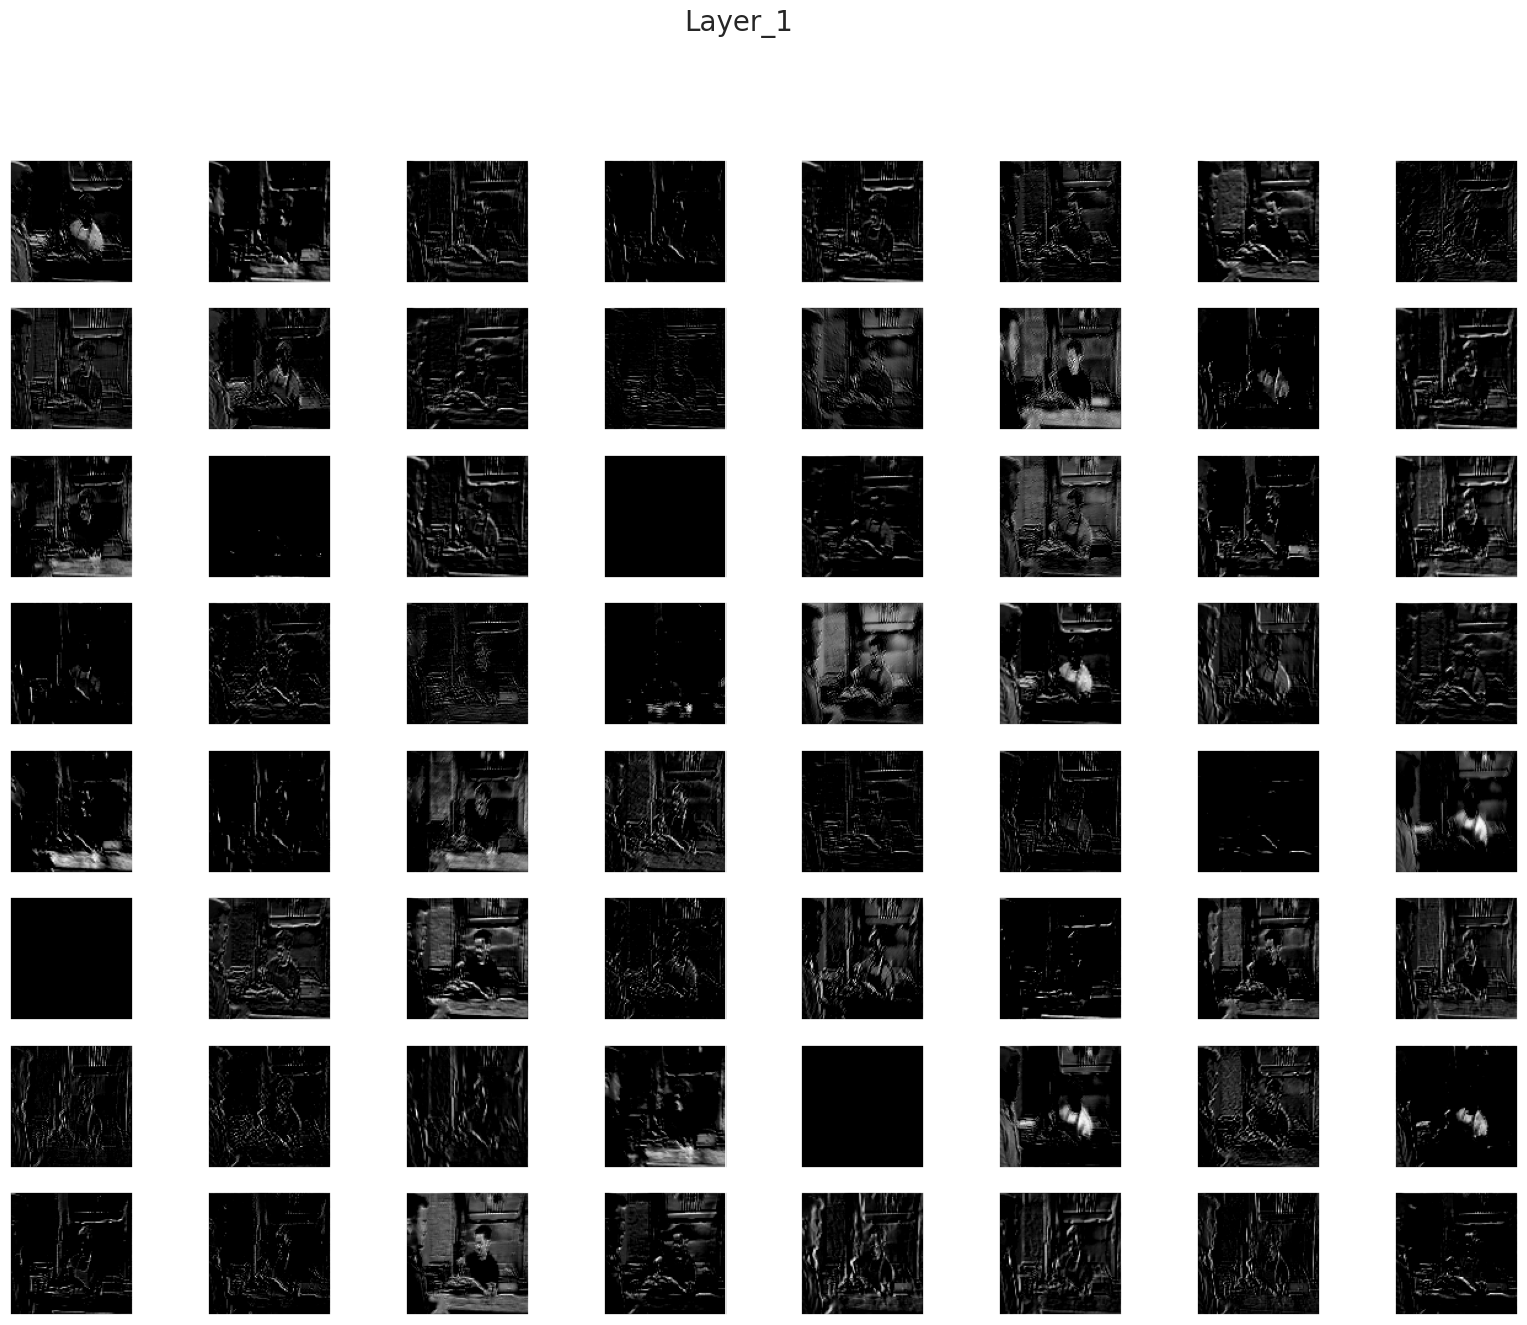

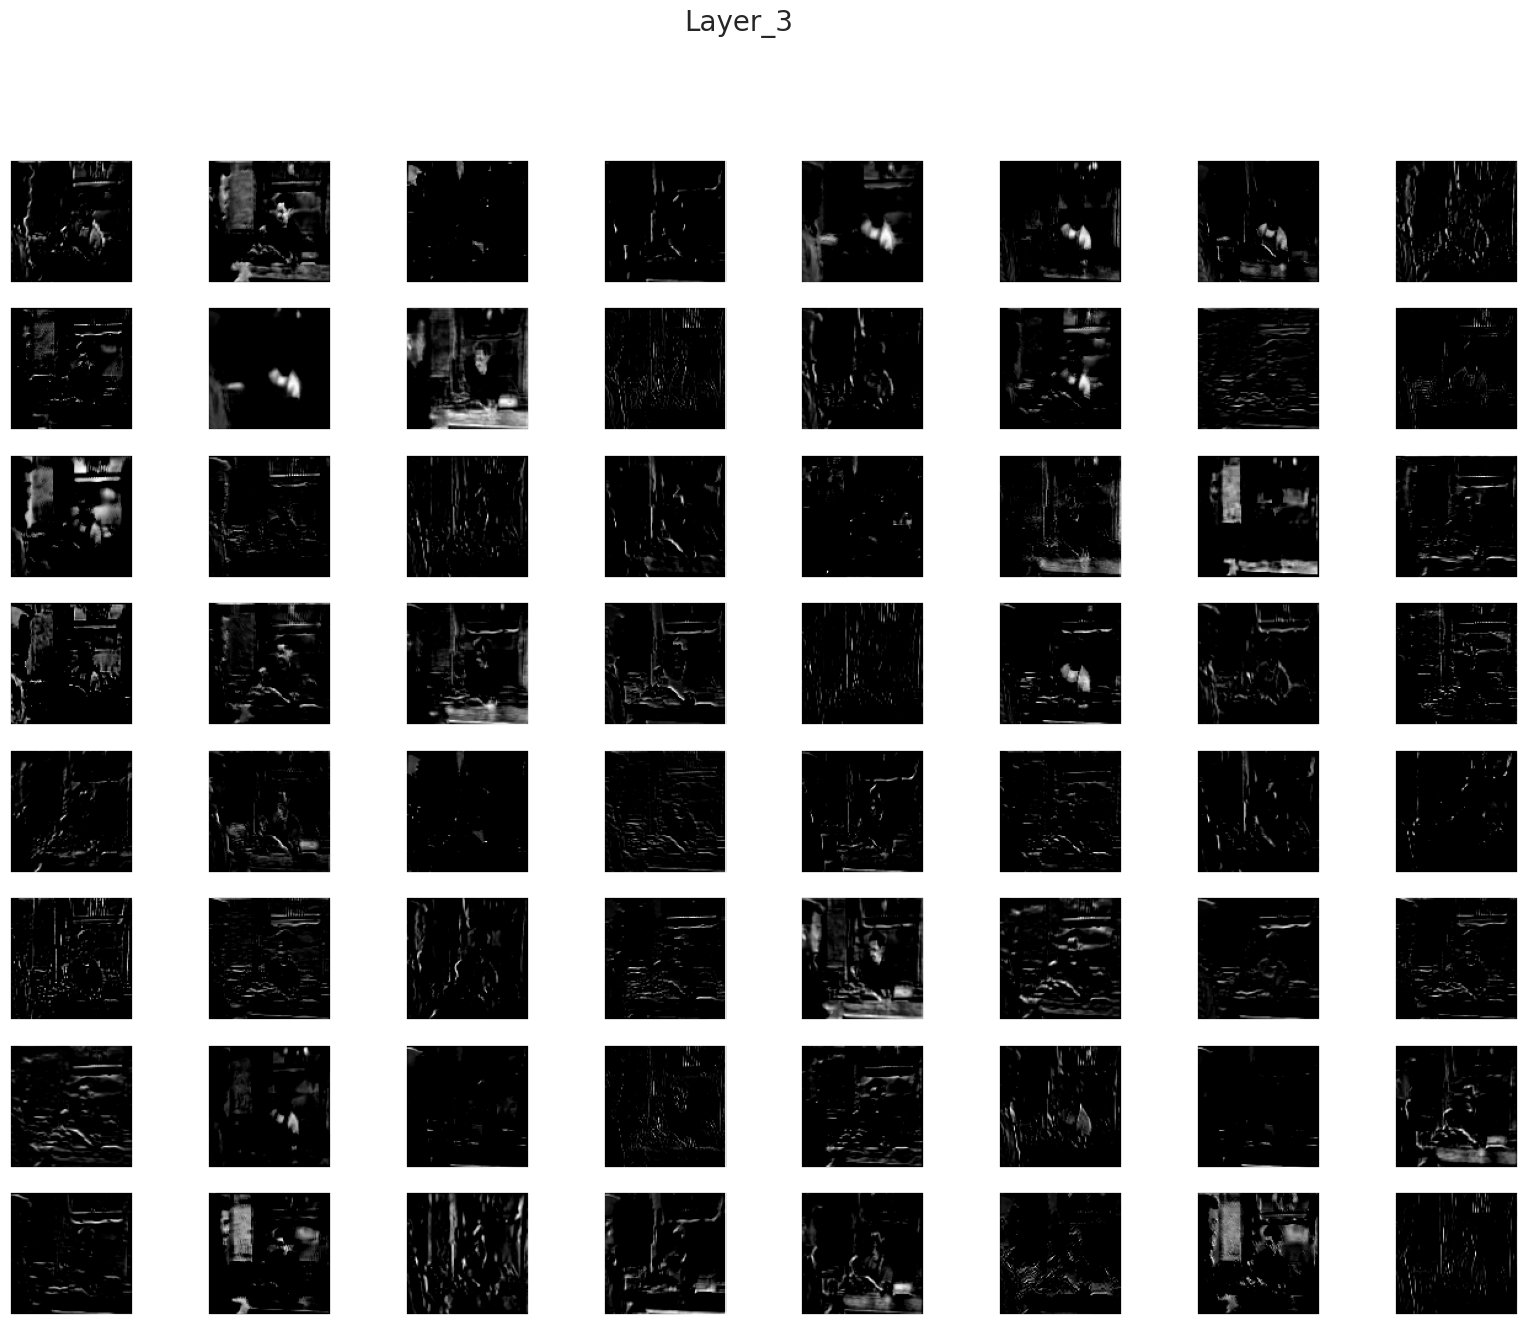

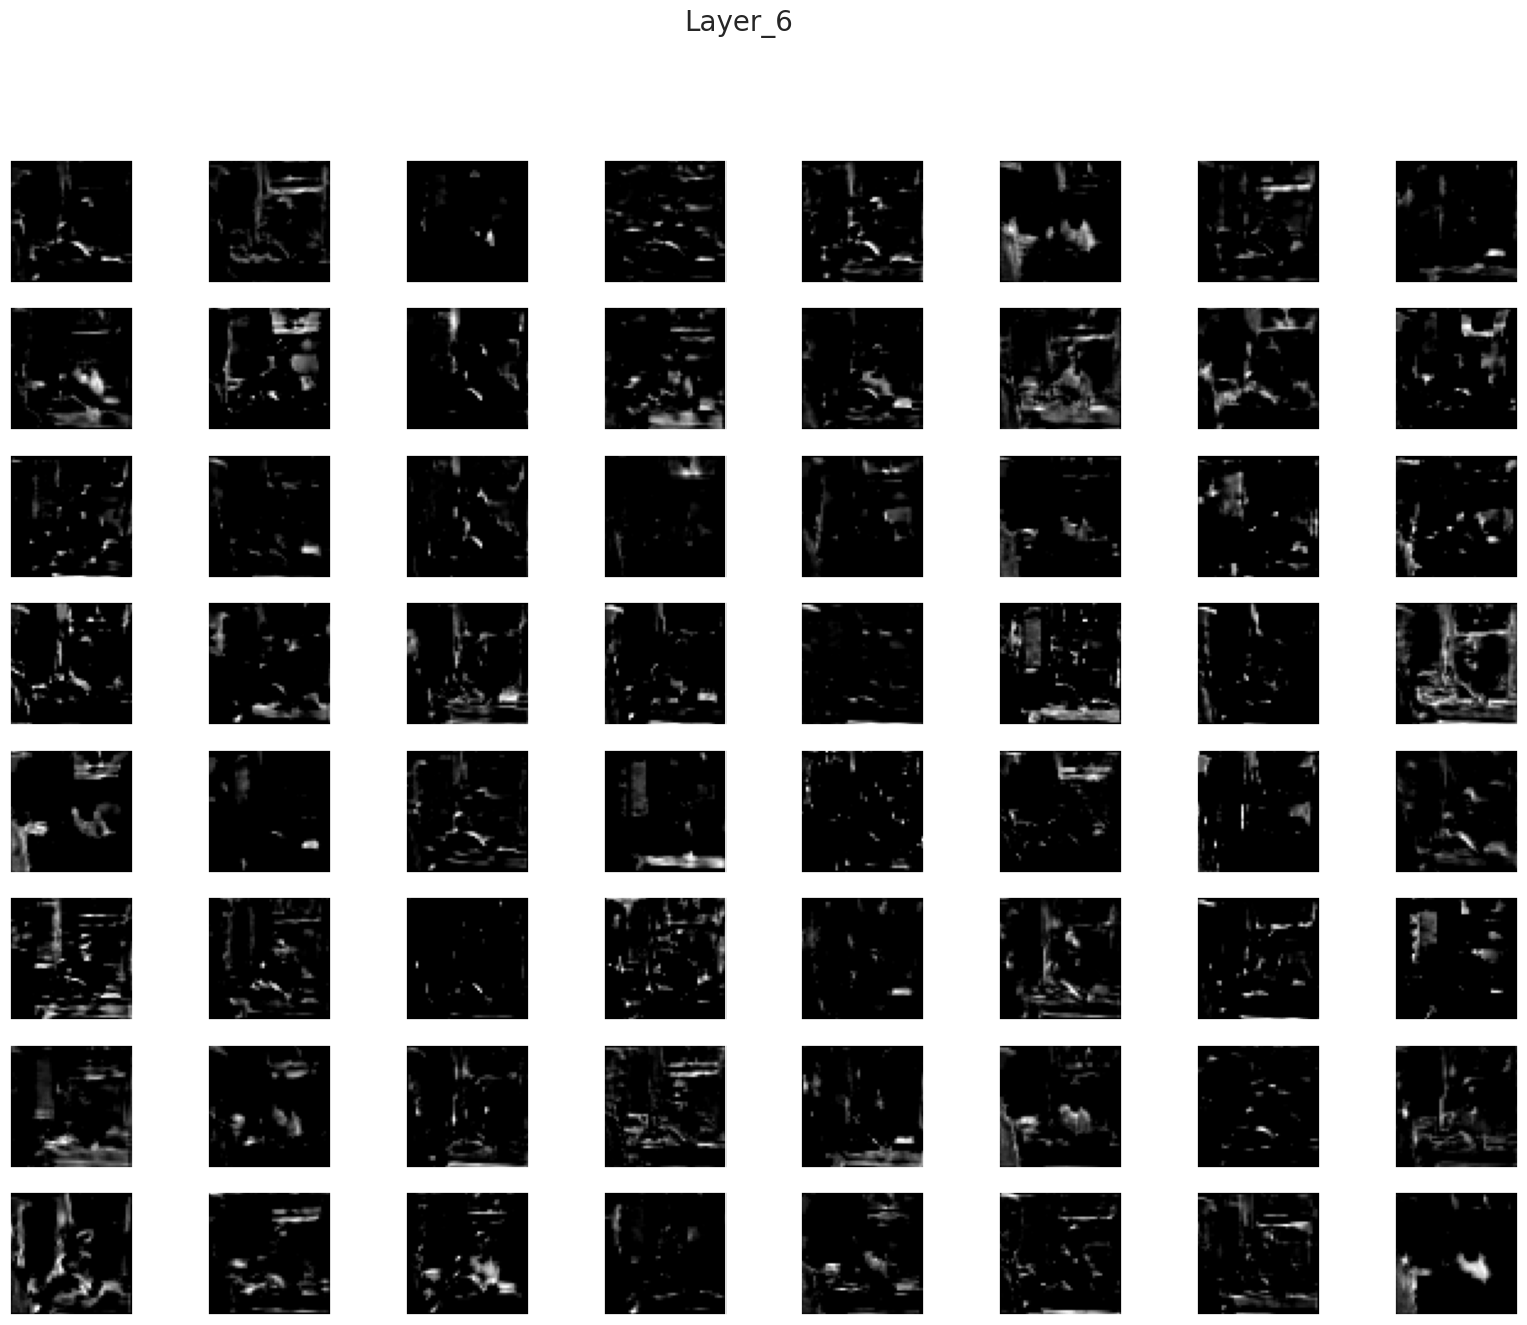

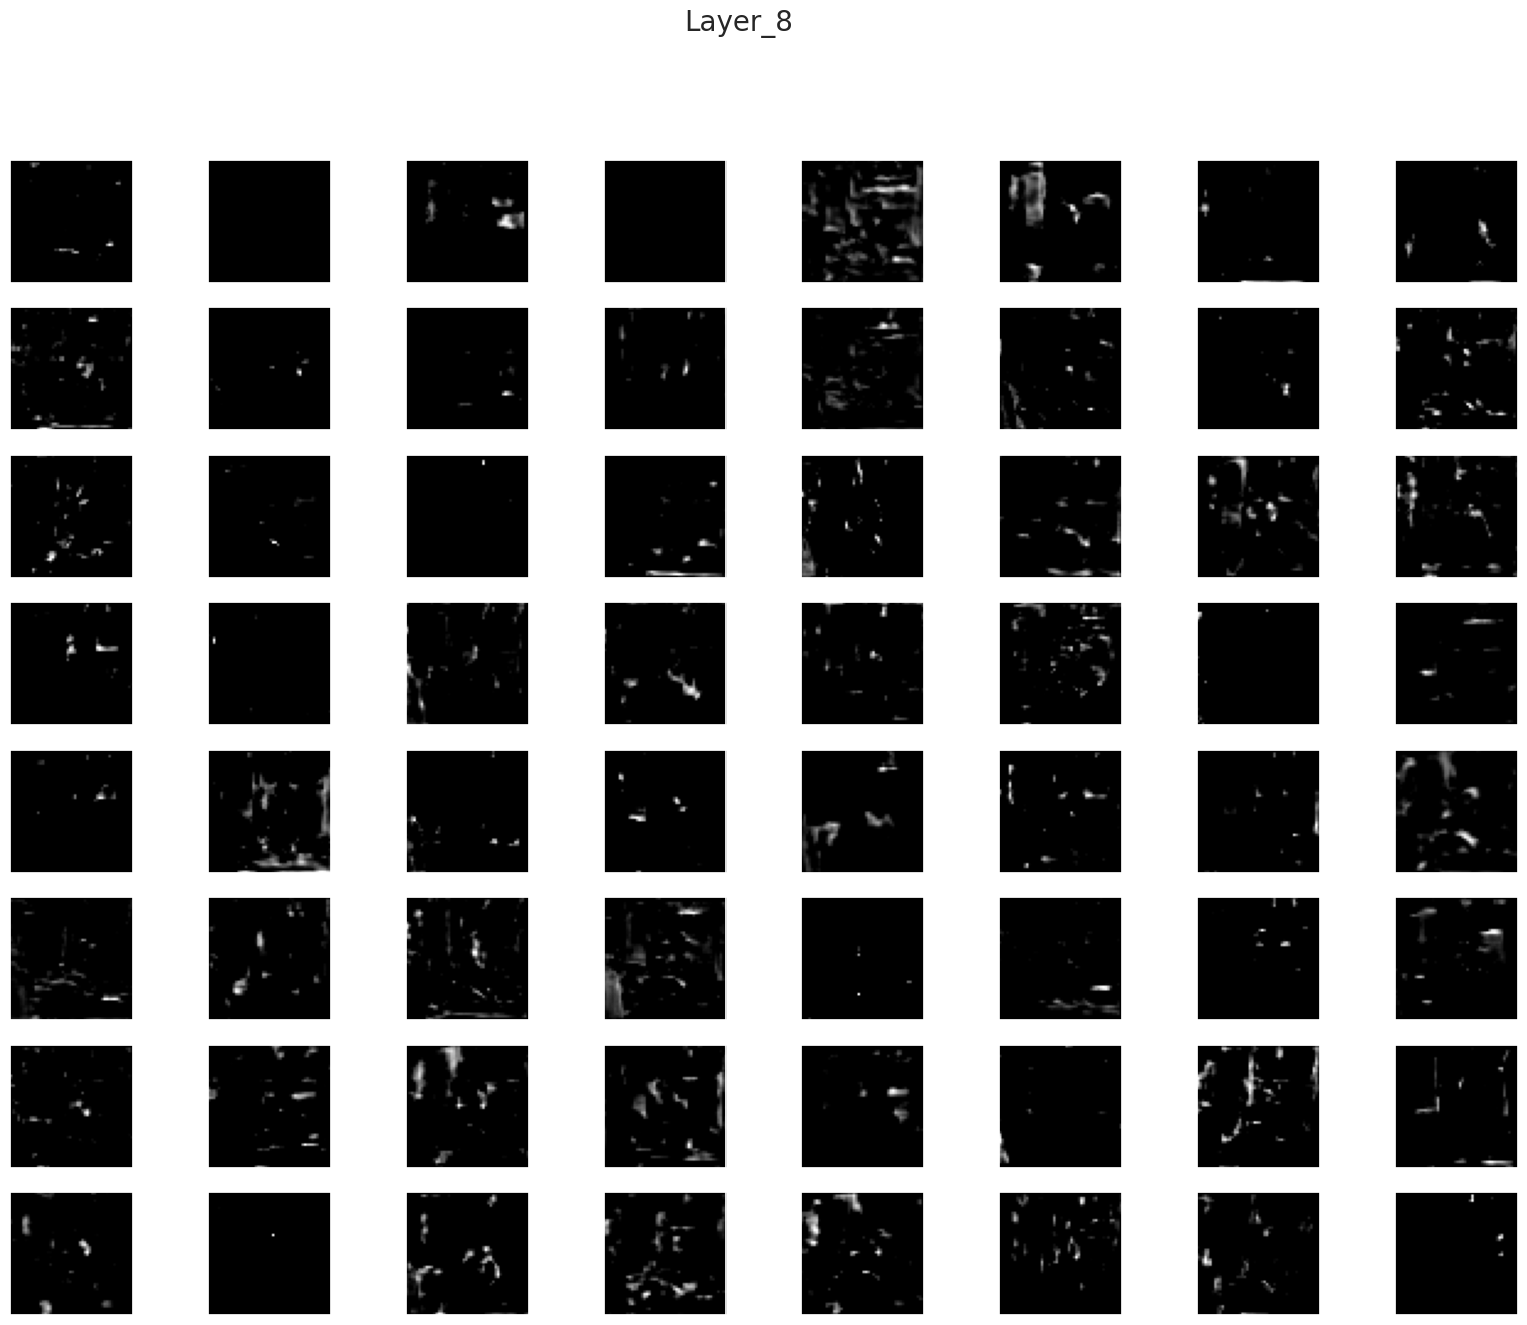

In [ ]:
columns = 8
rows = 8
for i,fmap in zip(layer_index,feature_output):
    fig = plt.figure(figsize=(20,15))
    fig.suptitle("Layer_{}".format(i) , fontsize=20)
    for i in range(1, columns*rows +1):
        fig =plt.subplot(rows, columns, i)
        fig.set_xticks([])  #Turn off axis
        fig.set_yticks([])
        plt.imshow(fmap[0, :, :, i-1], cmap='gray')

        #pos += 1


plt.show()

Análisis de los Feature Maps

Para realizar el análisis de las features maps primero se debe entender que estas se utilizan para reconocer patrones visuales y entenderlos de la forma correcta.

En la visualización de los feature maps de la red neuronal convolucional para el modelo creado, se observan varios aspectos clave:

A medida que se avanza en las capas se nota una progresión en las características ya que toma que las características mas importantes, teniendo en cuenta esto se observa que mientras mas profunda era la capa más abstracta se hacía la salida.

Se pudo seguir la transformación de las características a medida que fluían a través de las capas convolucionales. Los feature maps de una capa estaban relacionados con los de la capa anterior, lo que sugería una jerarquía en la extracción de características. Las características extraídas en las capas iniciales se combinaban y se mejoraban en capas siguientes para detectar características más complejas.
